source - https://www.kaggle.com/subwaymatch/chicago-uberlyft-vehicles

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('chicago-ridesharing-vehicles.csv')

Looking at data

In [3]:
df.head()

,REPORTED_YEAR,REPORTED_MONTH,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS
0,2015,3,IL,Toyota,Highlander,Black,2010,263,False
1,2015,3,IL,Toyota,Camry,Black,2008,204,False
2,2015,3,IL,Toyota,Camry,Black,2009,122,False
3,2015,3,IL,Mazda,Mazda3,Silver,2012,150,False
4,2015,3,IL,Chrysler,Pt Cruiser,White/Pearl,2008,208,False


In [4]:
df.isna().any()

REPORTED_YEAR      False
REPORTED_MONTH     False
STATE              False
MAKE               False
MODEL              False
COLOR              False
MODEL_YEAR         False
NUMBER_OF_TRIPS    False
MULTIPLE_TNPS      False
dtype: bool

<AxesSubplot:>

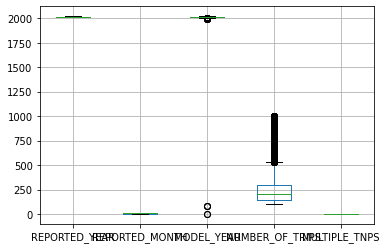

In [5]:
df.boxplot()

On the kaggle writes that this data had been already cleared. So, can close eyes on outliers. Also can see on box plot for NUMBER_OF_TRIPS that it's just such a distribution.

<AxesSubplot:>

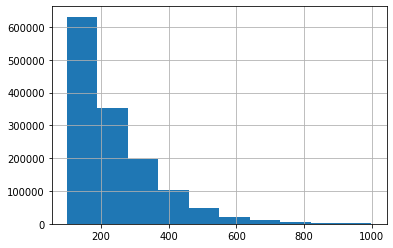

In [6]:
df.NUMBER_OF_TRIPS.hist()

In [7]:
df.REPORTED_YEAR.unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

<AxesSubplot:>

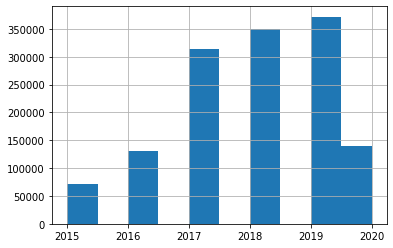

In [8]:
df.REPORTED_YEAR.hist()

In [9]:
df.REPORTED_MONTH.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2], dtype=int64)

<AxesSubplot:>

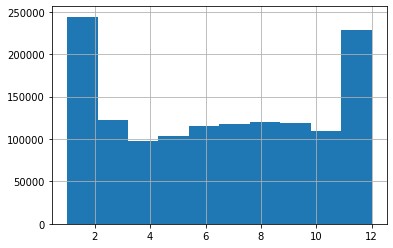

In [10]:
df.REPORTED_MONTH.hist()

in January and February more trips

In [11]:
df.STATE.unique()

array(['IL', 'IN', 'IA', 'WI', 'MI', 'KY', 'OH', 'TX', 'AL', 'CA', 'MA',
       'MO', 'WA', 'FL', 'CO', 'NY', 'MN', 'SC', 'AR', 'NC', 'KS', 'AZ',
       'TN', 'VA', 'NJ', 'RI', 'GA', 'SD', 'MD', 'DE', 'WV', 'CT', 'NM',
       'ID', 'PA', 'OK', 'MS', 'NV', 'LA', 'ND', 'NE', 'ME', 'UT', 'HI',
       'MT', 'NH', 'WY', 'DC', 'OR', 'VT', 'AK'], dtype=object)

In [12]:
df.STATE.value_counts()

IL    1322708
IN      19583
FL       5529
WI       3074
TX       2790
CA       2616
MI       2053
GA       1657
OH       1631
MO       1251
IA       1123
PA       1082
NY        921
VA        757
CO        729
TN        724
AZ        683
LA        676
KY        636
NJ        602
ID        595
MN        500
MD        499
WA        477
MA        465
OK        462
SC        461
NC        425
MS        353
AL        337
NV        250
AR        247
KS        231
CT        190
OR        168
NE        163
NM        127
SD        114
UT        112
ND         98
WV         96
AK         86
DE         82
RI         76
MT         28
VT         28
DC         27
ME         19
NH         17
HI         15
WY         10
Name: STATE, dtype: int64

In [13]:
df.MAKE.unique()

array(['Toyota', 'Mazda', 'Chrysler', 'Nissan', 'Audi', 'Ford',
       'Chevrolet', 'Hyundai', 'Pontiac', 'Honda', 'Cadillac', 'Bmw',
       'Acura', 'Dodge', 'Kia', 'Jeep', 'Volkswagen', 'Lexus',
       'Mitsubishi', 'Suzuki', 'Lincoln', 'Subaru', 'Saturn',
       'Land Rover', 'Buick', 'Infiniti', 'Mercedes-Benz', 'Scion',
       'Saab', 'Byd', 'Gmc', 'Mercury', 'Jaguar', 'Mini', 'Volvo',
       'Hummer', 'Tesla', 'Fiat', 'Oldsmobile', 'Ram', 'Isuzu', 'Porsche',
       'Mercedesbenz', 'Chevy', 'Mercedes', 'Ram Trucks', 'Genesis',
       'Am General', 'Mv Agusta', 'Alfa Romeo', 'Mercedes Benz'],
      dtype=object)

There are duplicate values for 'Mercedes-Benz' and we will need remove them.

In [14]:
df.MAKE.value_counts()

Toyota           351368
Nissan           178602
Honda            121011
Chevrolet        118649
Hyundai          109433
Ford              85505
Kia               54554
Dodge             50241
Volkswagen        39136
Jeep              33758
Chrysler          31516
Lincoln           24093
Mazda             22316
Lexus             20593
Acura             19353
Buick             15234
Infiniti          13147
Mitsubishi        12883
Gmc               10706
Cadillac           9090
Subaru             8158
Bmw                8025
Scion              5778
Mercedesbenz       5333
Audi               4857
Pontiac            4452
Mercedes-Benz      3462
Volvo              3150
Mercury            3071
Saturn             2506
Mercedes Benz      1363
Suzuki             1219
Chevy               901
Fiat                668
Land Rover          668
Saab                574
Jaguar              409
Tesla               347
Mini                262
Ram                 260
Hummer              250
Porsche         

In [15]:
df.MODEL.unique()

array(['Highlander', 'Camry', 'Mazda3', 'Pt Cruiser', 'Sentra', 'Avalon',
       'A4', 'Fusion', 'Malibu', 'Sonata', 'Corolla', 'Equinox', 'Prius',
       'Impala', 'Explorer', 'Trailblazer', 'Sonic', 'G6', 'Civic', 'Sts',
       '7-Series', 'Sienna', 'Tl', 'Corolla Matrix', 'Grand Caravan',
       'Fiesta', 'Cruze', 'Cx-5', 'A6', 'Hhr', 'Pilot', 'Soul', 'Accord',
       'Prius V', 'Commander', 'Escape', 'Prius C', 'Charger', 'Passat',
       'Altima', 'Cobalt', 'Fusion Hybrid', 'Civic Hybrid', 'Patriot',
       'Rio', '300', 'Murano', 'Town And Country', 'Rogue', 'Rx',
       'Outlander', 'Traverse', 'Mazda6', 'Versa', 'Rav4', 'Is', 'Jetta',
       'Cr-V', 'Sx4', 'Mkz', 'Wrangler', 'Fit', 'Optima', 'Camry Hybrid',
       'Focus', 'Forester', 'Ion', 'Lr2', 'Cube', 'Lacrosse', '200',
       'Xterra', 'Santa Fe', 'G Sedan', 'Grand Cherokee', 'Mdx',
       'C-Class', 'Caravan', 'Elantra', 'Xb', 'Rendezvous', 'Compass',
       'Montero', 'Outlander Sport', 'Cla-Class', 'Legacy', '42252',
 

There are also duplicates like 'Cx-7', 'Cx 7', 'Cx7'

In [16]:
df.MODEL.value_counts()

Camry           129143
Corolla          64887
Altima           61352
Prius            56870
Sentra           54599
                 ...  
Cr                  15
Jetta Hybrid        15
Xt4                 15
Ram                 15
Wrangler Jk         15
Name: MODEL, Length: 645, dtype: int64

In [17]:
df.COLOR.unique()

array(['Black', 'Silver', 'White/Pearl', 'Grey', 'Blue', 'Green', 'Gold',
       'Red', 'Beige/Gold', 'White', '#Name?', 'Yellow', 'Brown', 'Beige',
       'Silver Metallic', 'Orange', 'Gray', 'Tan', 'Silver Grey',
       'Light Blue', 'Medium Grey', 'Purple', 'Bronze', 'Dark Gray',
       'Dark Grey', 'Brown (Light)', 'Burgundy', 'Blue And White',
       'Baby Blue', 'Metallic Beige', 'Dark Blue', 'Silver Gray',
       'Gray Metallic', 'Navy', 'Charcoal', '"Black"', '"', '"Grey"',
       '"Beige/Gold"', '"Green"', '"Silver"', '"White"', '"Red"',
       '"White/Pearl"', '"Beige"', '"Blue"', '"Purple"', '"Orange"',
       '"Dark Blue"', '"Brown"', '"Medium Grey"', '"Green "',
       '"Charcoal"', '"Dark Gray"', '"Gray"', 'Other', '"Gray Metallic"',
       '"Navy"', '"Baby Blue"', '"Pearl Blue"', '"Yellow"',
       '"Blue And White"', '"Metallic Beige"', '"Silver Metallic"',
       '"Dark Grey"', '"Tan"', '"Gold"', '"Light Sandrift Metallic"',
       'Teal', '"Brown (Light)"', 'Pearl Blu

In [18]:
df.COLOR.value_counts()

Black                  445330
Silver                 278646
White                  203917
Gray                   174165
Red                     69468
                        ...  
Sea Blue Pearl              1
Silver-Gray                 1
Blue Topaz Mettalic         1
Granite                     1
"Dark Blue"                 1
Name: COLOR, Length: 177, dtype: int64

For example values with quotes. Also rare colors can make results less acurate.

Let's start to remove difference in colors:

In [19]:
fun = lambda x: str(x).replace('\"', '').replace(' ', '').replace('-', '').lower().replace('gray', 'grey').replace('dk', 'dark').replace('mettalic', '').replace('mettallic', '').replace('metallic', '').replace('\/', '')
df['CHANGED_COLOR'] = df['COLOR'].apply(fun)

In [20]:
df.head()

,REPORTED_YEAR,REPORTED_MONTH,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS,CHANGED_COLOR
0,2015,3,IL,Toyota,Highlander,Black,2010,263,False,black
1,2015,3,IL,Toyota,Camry,Black,2008,204,False,black
2,2015,3,IL,Toyota,Camry,Black,2009,122,False,black
3,2015,3,IL,Mazda,Mazda3,Silver,2012,150,False,silver
4,2015,3,IL,Chrysler,Pt Cruiser,White/Pearl,2008,208,False,white/pearl


In [21]:
df['CHANGED_COLOR'].value_counts()

black            448821
silver           278958
white            204065
grey             180778
red               69646
                  ...  
tonicpink             1
darkchocolate         1
rainbow               1
champaign             1
silversky             1
Name: CHANGED_COLOR, Length: 109, dtype: int64

In [22]:
df.CHANGED_COLOR.unique()

array(['black', 'silver', 'white/pearl', 'grey', 'blue', 'green', 'gold',
       'red', 'beige/gold', 'white', '#name?', 'yellow', 'brown', 'beige',
       'orange', 'tan', 'silvergrey', 'lightblue', 'mediumgrey', 'purple',
       'bronze', 'darkgrey', 'brown(light)', 'burgundy', 'blueandwhite',
       'babyblue', 'darkblue', 'navy', 'charcoal', '', 'other',
       'pearlblue', 'lightsandrift', 'teal', 'maroon', 'teagreen',
       'rubyred', 'darksilver', 'olive', 'smokeyblue', 'burgandy', '0',
       'siennagold', 'tonicpink', 'cream', 'cosmicwhite', 'darkgold',
       'tannishgrey', 'ecogreenpearlcoat', 'creamwhite', 'cream/white',
       'pearlwhite', 'golden', 'bluegreen', 'navyblue', 'phantomgrey',
       'symphonysilver', 'sapphireblack', 'granite', 'bluetopaz',
       'seabluepearl', 'bluecrush', 'rainbow', 'darkchocolate',
       'silversky', 'champaign', 'gunmetal', 'midnightblue',
       'lightsteelblue', 'darkolivegreen', 'gainsboro', 'darkslateblue',
       'dimgrey', 'dark

In [23]:
fun = lambda x: str(x).replace('0', 'nan').replace('#name?', 'nan').replace(' ', 'nan').replace('other', 'nan')
df['CHANGED_COLOR'] = df['CHANGED_COLOR'].apply(fun)

In [24]:
import re

In [25]:
df.CHANGED_COLOR.unique()

array(['black', 'silver', 'white/pearl', 'grey', 'blue', 'green', 'gold',
       'red', 'beige/gold', 'white', 'nan', 'yellow', 'brown', 'beige',
       'orange', 'tan', 'silvergrey', 'lightblue', 'mediumgrey', 'purple',
       'bronze', 'darkgrey', 'brown(light)', 'burgundy', 'blueandwhite',
       'babyblue', 'darkblue', 'navy', 'charcoal', '', 'pearlblue',
       'lightsandrift', 'teal', 'maroon', 'teagreen', 'rubyred',
       'darksilver', 'olive', 'smokeyblue', 'burgandy', 'siennagold',
       'tonicpink', 'cream', 'cosmicwhite', 'darkgold', 'tannishgrey',
       'ecogreenpearlcoat', 'creamwhite', 'cream/white', 'pearlwhite',
       'golden', 'bluegreen', 'navyblue', 'phantomgrey', 'symphonysilver',
       'sapphireblack', 'granite', 'bluetopaz', 'seabluepearl',
       'bluecrush', 'rainbow', 'darkchocolate', 'silversky', 'champaign',
       'gunmetal', 'midnightblue', 'lightsteelblue', 'darkolivegreen',
       'gainsboro', 'darkslateblue', 'dimgrey', 'darkslategrey',
       'whit

In [26]:
df.CHANGED_COLOR.value_counts()

black            448821
silver           278958
white            204065
grey             180778
red               69646
                  ...  
darkchocolate         1
rainbow               1
bluecrush             1
lightsandrift         1
bluegreen             1
Name: CHANGED_COLOR, Length: 107, dtype: int64

In [27]:
df.CHANGED_COLOR.value_counts()[:40]

black             448821
silver            278958
white             204065
grey              180778
red                69646
blue               62264
darkred            41279
darkblue           19956
gold               15220
tan                13865
green               7521
brown               7495
burgundy            6022
lightblue           4172
darkgrey            2555
lightgreen          1733
orange              1618
white/pearl         1539
                    1226
beige               1063
purple               968
yellow               916
teal                 633
darkslategrey        583
dimgrey              546
beige/gold           494
midnightblue         454
crimson              376
nan                  332
maroon               306
whitesmoke           294
lightslategrey       247
slategrey            214
lightsteelblue       210
gainsboro            184
darkslateblue        150
pink                  85
lightgrey             80
darkkhaki             70
darkgreen             67


Here I made up find some name_to_rgb parser and I had found.

In [28]:
import webcolors

In [29]:
webcolors.html5_parse_legacy_color(u'darkkhaki')

HTML5SimpleColor(red=189, green=183, blue=107)

So you can see example of darkkhaki color. I put RGB in mixer and found this color. They are the same.

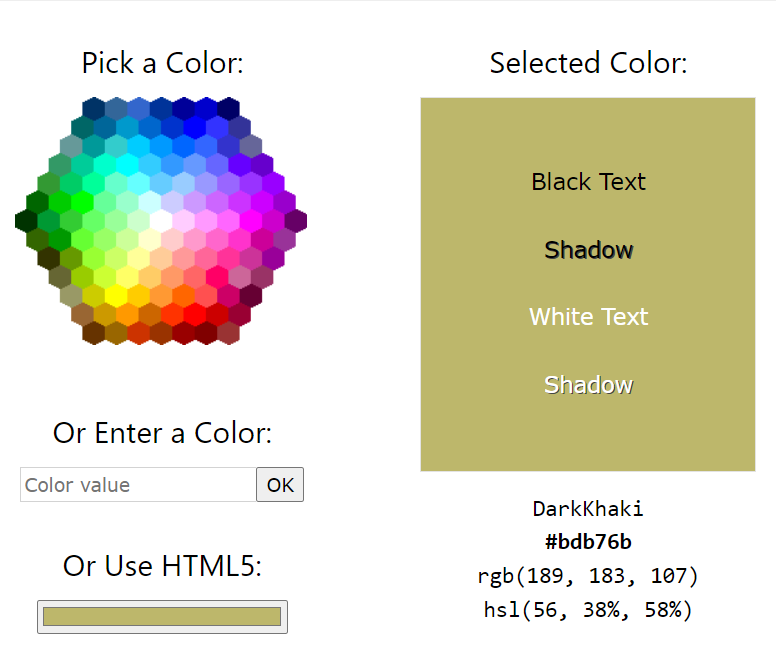

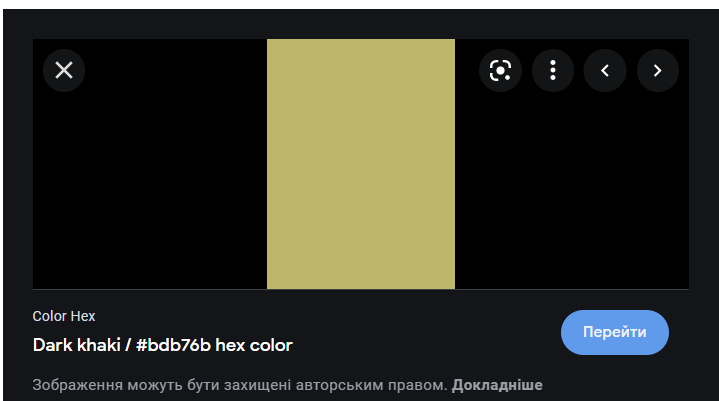

In [30]:
x = 'darkkhaki'
webcolors.html5_parse_legacy_color(u'{}'.format(x))

HTML5SimpleColor(red=189, green=183, blue=107)

In [31]:
webcolors.name_to_rgb('darkkhaki')

IntegerRGB(red=189, green=183, blue=107)

In [32]:
rgb = webcolors.name_to_rgb('darkkhaki')

In [33]:
webcolors.rgb_to_name(rgb)

'darkkhaki'

In [34]:
df.CHANGED_COLOR.unique()

array(['black', 'silver', 'white/pearl', 'grey', 'blue', 'green', 'gold',
       'red', 'beige/gold', 'white', 'nan', 'yellow', 'brown', 'beige',
       'orange', 'tan', 'silvergrey', 'lightblue', 'mediumgrey', 'purple',
       'bronze', 'darkgrey', 'brown(light)', 'burgundy', 'blueandwhite',
       'babyblue', 'darkblue', 'navy', 'charcoal', '', 'pearlblue',
       'lightsandrift', 'teal', 'maroon', 'teagreen', 'rubyred',
       'darksilver', 'olive', 'smokeyblue', 'burgandy', 'siennagold',
       'tonicpink', 'cream', 'cosmicwhite', 'darkgold', 'tannishgrey',
       'ecogreenpearlcoat', 'creamwhite', 'cream/white', 'pearlwhite',
       'golden', 'bluegreen', 'navyblue', 'phantomgrey', 'symphonysilver',
       'sapphireblack', 'granite', 'bluetopaz', 'seabluepearl',
       'bluecrush', 'rainbow', 'darkchocolate', 'silversky', 'champaign',
       'gunmetal', 'midnightblue', 'lightsteelblue', 'darkolivegreen',
       'gainsboro', 'darkslateblue', 'dimgrey', 'darkslategrey',
       'whit

So, I decided to look how much colors from our dataset I can parse

In [35]:
#fun = lambda x: webcolors.html5_parse_legacy_color(u'{}'.format(x))
for col in df.CHANGED_COLOR.unique():
    try:
        print(col)
        rgb = webcolors.name_to_rgb(col)
        print(rgb)
        print(webcolors.rgb_to_name(rgb))
    except:
        print('ERROR', col)

black
IntegerRGB(red=0, green=0, blue=0)
black
silver
IntegerRGB(red=192, green=192, blue=192)
silver
white/pearl
ERROR white/pearl
grey
IntegerRGB(red=128, green=128, blue=128)
gray
blue
IntegerRGB(red=0, green=0, blue=255)
blue
green
IntegerRGB(red=0, green=128, blue=0)
green
gold
IntegerRGB(red=255, green=215, blue=0)
gold
red
IntegerRGB(red=255, green=0, blue=0)
red
beige/gold
ERROR beige/gold
white
IntegerRGB(red=255, green=255, blue=255)
white
nan
ERROR nan
yellow
IntegerRGB(red=255, green=255, blue=0)
yellow
brown
IntegerRGB(red=165, green=42, blue=42)
brown
beige
IntegerRGB(red=245, green=245, blue=220)
beige
orange
IntegerRGB(red=255, green=165, blue=0)
orange
tan
IntegerRGB(red=210, green=180, blue=140)
tan
silvergrey
ERROR silvergrey
lightblue
IntegerRGB(red=173, green=216, blue=230)
lightblue
mediumgrey
ERROR mediumgrey
purple
IntegerRGB(red=128, green=0, blue=128)
purple
bronze
ERROR bronze
darkgrey
IntegerRGB(red=169, green=169, blue=169)
darkgray
brown(light)
ERROR brown

In [36]:
for col in df.CHANGED_COLOR.unique():
    try:
        webcolors.rgb_to_name(webcolors.name_to_rgb(col))
    except:
        print('ERROR', col)

ERROR white/pearl
ERROR beige/gold
ERROR nan
ERROR silvergrey
ERROR mediumgrey
ERROR bronze
ERROR brown(light)
ERROR burgundy
ERROR blueandwhite
ERROR babyblue
ERROR charcoal
ERROR 
ERROR pearlblue
ERROR lightsandrift
ERROR teagreen
ERROR rubyred
ERROR darksilver
ERROR smokeyblue
ERROR burgandy
ERROR siennagold
ERROR tonicpink
ERROR cream
ERROR cosmicwhite
ERROR darkgold
ERROR tannishgrey
ERROR ecogreenpearlcoat
ERROR creamwhite
ERROR cream/white
ERROR pearlwhite
ERROR golden
ERROR bluegreen
ERROR navyblue
ERROR phantomgrey
ERROR symphonysilver
ERROR sapphireblack
ERROR granite
ERROR bluetopaz
ERROR seabluepearl
ERROR bluecrush
ERROR rainbow
ERROR darkchocolate
ERROR silversky
ERROR champaign
ERROR gunmetal
ERROR rebeccapurple


Maybe it isn't the best solution, but I changed colors which hadn't been parsed to similar or 'other'

In [37]:
fun = lambda x : x.replace('white/pearl','pearl').replace('beige/gold','beige').replace('silvergrey', 'grey').replace('mediumgrey', 'grey').\
    replace('bronze', 'red').replace('brown(light)', 'brown').replace('burgundy', 'darkred').replace('blueandwhite', 'blue').\
    replace('babyblue', 'blue').replace('charcoal', 'black').replace('pearlblue', 'blue').replace('lightsandrift', 'other').\
    replace('teagreen', 'green').replace('rubyred', 'red').replace('darksilver', 'silver').replace('smokeyblue', 'blue').\
    replace('burgandy', 'darkred').replace('siennagold', 'gold').replace('tannishgrey', 'grey').replace('tonicpink', 'pink').\
    replace('cream', 'other').replace('cosmicwhite', 'white').replace('darkgold', 'gold').replace('ecogreenpearlcoat', 'other').\
    replace('creamwhite', 'white').replace('cream/white', 'white').replace('pearlwhite', 'pearl').replace('golden', 'gold').\
    replace('bluegreen', 'other').replace('navyblue', 'blue').replace('phantomgrey', 'grey').\
    replace('symphonysilver', 'silver').replace('sapphireblack', 'black').replace('granite', 'other').replace('bluetopaz', 'blue').\
    replace('seabluepearl', 'other').replace('rainbow', 'other').replace('darkchocolate', 'darkbrown').replace('silversky', 'silver').\
    replace('champaign', 'other').replace('gunmetal', 'other').replace('rebeccapurple', 'purple').replace('pearl', 'other').\
    replace('nan', 'other').replace('otherwhite', 'white').replace('other/white', 'white').replace('bluecrush', 'blue').\
    replace('darkbrown', 'brown').replace('palegoldrod', 'other')
df['CHANGED_COLOR'] = df.CHANGED_COLOR.apply(fun)

In [38]:
for col in df.CHANGED_COLOR.unique():
    try:
        webcolors.rgb_to_name(webcolors.name_to_rgb(col))
    except:
        print('ERROR', col)

ERROR other
ERROR 


In [39]:
df.CHANGED_COLOR.unique()

array(['black', 'silver', 'other', 'grey', 'blue', 'green', 'gold', 'red',
       'beige', 'white', 'yellow', 'brown', 'orange', 'tan', 'lightblue',
       'purple', 'darkgrey', 'darkred', 'darkblue', 'navy', '', 'teal',
       'maroon', 'olive', 'pink', 'midnightblue', 'lightsteelblue',
       'darkolivegreen', 'gainsboro', 'darkslateblue', 'dimgrey',
       'darkslategrey', 'whitesmoke', 'rosybrown', 'lightslategrey',
       'crimson', 'slategrey', 'peru', 'thistle', 'sienna', 'oldlace',
       'saddlebrown', 'darkseagreen', 'steelblue', 'firebrick',
       'forestgreen', 'lightgrey', 'darkkhaki', 'powderblue', 'lavender',
       'floralwhite', 'cadetblue', 'ivory', 'darkgreen', 'linen',
       'palevioletred', 'seagreen', 'dodgerblue', 'yellowgreen', 'indigo',
       'orangered', 'darkorange', 'lightgreen'], dtype=object)

In [40]:
fun = lambda x : x if x else 'other'
df['CHANGED_COLOR'] = df['CHANGED_COLOR'].apply(fun)

So, I made RGB features to get some intresting visualization

In [41]:
def to_rgb(name):
    if(name != 'other'):
        return webcolors.name_to_rgb(name)
    else:
        return (None, None, None)

In [42]:
RGB_df = df['CHANGED_COLOR'].apply(to_rgb)

In [43]:
df['R'] = RGB_df.apply(lambda x: x[0])
df['G'] = RGB_df.apply(lambda x: x[1])
df['B'] = RGB_df.apply(lambda x: x[2])

In [44]:
df.describe()

,REPORTED_YEAR,REPORTED_MONTH,MODEL_YEAR,NUMBER_OF_TRIPS,R,G,B
count,1.377583e+06,1.377583e+06,1.377583e+06,1.377583e+06,1.374462e+06,1.374462e+06,1.374462e+06
mean,2.017898e+03,6.472821e+00,2.013004e+03,2.387770e+02,1.194692e+02,1.010938e+02,1.108574e+02
std,1.319378e+00,3.488728e+00,5.375876e+00,1.306030e+02,1.035835e+02,1.023695e+02,1.039834e+02
min,2.015000e+03,1.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.017000e+03,3.000000e+00,2.011000e+03,1.410000e+02,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.018000e+03,7.000000e+00,2.014000e+03,2.010000e+02,1.280000e+02,1.280000e+02,1.280000e+02
75%,2.019000e+03,9.000000e+00,2.016000e+03,2.980000e+02,1.920000e+02,1.920000e+02,1.920000e+02
max,2.020000e+03,1.200000e+01,2.021000e+03,9.990000e+02,2.550000e+02,2.550000e+02,2.550000e+02


There are incorrect values for MODEL_YEAR feature [0, 79]

In [45]:
df.MODEL_YEAR.unique()

array([2010, 2008, 2009, 2012, 2014, 2005, 2006, 2007, 2015, 2013, 2004,
       2011, 2002, 2001, 2016, 2003, 2000,    0,   79, 1997, 2017, 2018,
       1994, 1995, 2019, 2020, 2021], dtype=int64)

<AxesSubplot:>

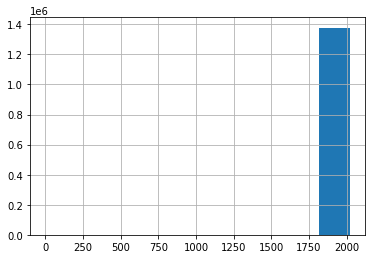

In [46]:
df.MODEL_YEAR.hist()

There are a few incorrect values(0 and 79)

In [47]:
df[df.MODEL_YEAR == 0].count()

REPORTED_YEAR      2
REPORTED_MONTH     2
STATE              2
MAKE               2
MODEL              2
COLOR              2
MODEL_YEAR         2
NUMBER_OF_TRIPS    2
MULTIPLE_TNPS      2
CHANGED_COLOR      2
R                  2
G                  2
B                  2
dtype: int64

In [48]:
df[df.MODEL_YEAR == 79].count()

REPORTED_YEAR      3
REPORTED_MONTH     3
STATE              3
MAKE               3
MODEL              3
COLOR              3
MODEL_YEAR         3
NUMBER_OF_TRIPS    3
MULTIPLE_TNPS      3
CHANGED_COLOR      3
R                  3
G                  3
B                  3
dtype: int64

So, only 5 objects have incorrect values and it isn't a problem if we delete them

In [49]:
df = df[(df.MODEL_YEAR != 79) & (df.MODEL_YEAR != 0)]

<AxesSubplot:>

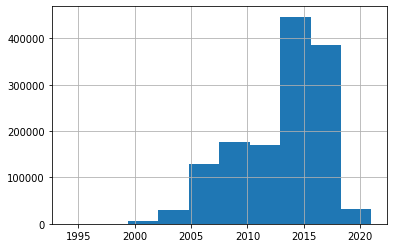

In [50]:
df.MODEL_YEAR.hist()

<AxesSubplot:>

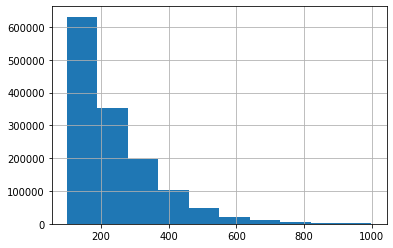

In [51]:
df.NUMBER_OF_TRIPS.hist()

In [52]:
df.NUMBER_OF_TRIPS.describe()

count    1.377578e+06
mean     2.387771e+02
std      1.306031e+02
min      1.000000e+02
25%      1.410000e+02
50%      2.010000e+02
75%      2.980000e+02
max      9.990000e+02
Name: NUMBER_OF_TRIPS, dtype: float64

In [53]:
df.MULTIPLE_TNPS.value_counts()

False    1032764
True      344814
Name: MULTIPLE_TNPS, dtype: int64

In [54]:
df.count()

REPORTED_YEAR      1377578
REPORTED_MONTH     1377578
STATE              1377578
MAKE               1377578
MODEL              1377578
COLOR              1377578
MODEL_YEAR         1377578
NUMBER_OF_TRIPS    1377578
MULTIPLE_TNPS      1377578
CHANGED_COLOR      1377578
R                  1374457
G                  1374457
B                  1374457
dtype: int64

In [55]:
df.drop(['REPORTED_YEAR', 'REPORTED_MONTH'], axis = 1).drop_duplicates()

,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS,CHANGED_COLOR,R,G,B
0,IL,Toyota,Highlander,Black,2010,263,False,black,0.0,0.0,0.0
1,IL,Toyota,Camry,Black,2008,204,False,black,0.0,0.0,0.0
2,IL,Toyota,Camry,Black,2009,122,False,black,0.0,0.0,0.0
3,IL,Mazda,Mazda3,Silver,2012,150,False,silver,192.0,192.0,192.0
4,IL,Chrysler,Pt Cruiser,White/Pearl,2008,208,False,other,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1377572,IL,Honda,Odyssey,Blue,2014,389,False,blue,0.0,0.0,255.0
1377576,IL,Kia,Soul,Silver,2017,261,False,silver,192.0,192.0,192.0
1377577,IL,Toyota,Prius,Blue,2007,293,False,blue,0.0,0.0,255.0
1377579,IL,Dodge,Journey,Silver,2019,312,True,silver,192.0,192.0,192.0


In [56]:
df.head()

,REPORTED_YEAR,REPORTED_MONTH,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS,CHANGED_COLOR,R,G,B
0,2015,3,IL,Toyota,Highlander,Black,2010,263,False,black,0.0,0.0,0.0
1,2015,3,IL,Toyota,Camry,Black,2008,204,False,black,0.0,0.0,0.0
2,2015,3,IL,Toyota,Camry,Black,2009,122,False,black,0.0,0.0,0.0
3,2015,3,IL,Mazda,Mazda3,Silver,2012,150,False,silver,192.0,192.0,192.0
4,2015,3,IL,Chrysler,Pt Cruiser,White/Pearl,2008,208,False,other,NaN,NaN,NaN


New feature - difference between reported year and model year to get run time for car

In [57]:
df['RUN_TIME'] = df['REPORTED_YEAR'] - df['MODEL_YEAR']

<AxesSubplot:>

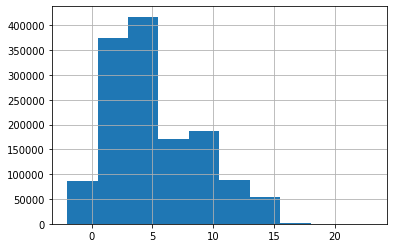

In [58]:
df.RUN_TIME.hist()

In [59]:
df.REPORTED_MONTH

0          3
1          3
2          3
3          3
4          3
          ..
1377578    9
1377579    9
1377580    9
1377581    9
1377582    9
Name: REPORTED_MONTH, Length: 1377578, dtype: int64

REPORTED_YEAR  REPORTED_MONTH
2015           3                 AxesSubplot(0.125,0.125;0.775x0.755)
               4                 AxesSubplot(0.125,0.125;0.775x0.755)
               5                 AxesSubplot(0.125,0.125;0.775x0.755)
               6                 AxesSubplot(0.125,0.125;0.775x0.755)
               7                 AxesSubplot(0.125,0.125;0.775x0.755)
                                                 ...                 
2020           5                 AxesSubplot(0.125,0.125;0.775x0.755)
               6                 AxesSubplot(0.125,0.125;0.775x0.755)
               7                 AxesSubplot(0.125,0.125;0.775x0.755)
               8                 AxesSubplot(0.125,0.125;0.775x0.755)
               9                 AxesSubplot(0.125,0.125;0.775x0.755)
Name: NUMBER_OF_TRIPS, Length: 67, dtype: object

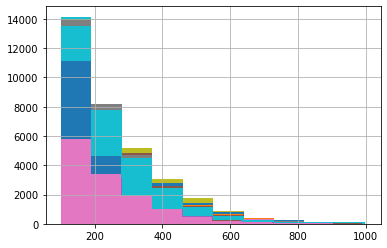

In [60]:
df.groupby(['REPORTED_YEAR', 'REPORTED_MONTH']).NUMBER_OF_TRIPS.hist()

In [61]:
import matplotlib.pyplot as plt

In [62]:
df.REPORTED_MONTH -= 1

New feature to get year and month in one feature for easier visualization

In [63]:
df['REPORTED_YEAR_MONTH'] = df['REPORTED_YEAR'] +  df['REPORTED_MONTH']/12

In [64]:
df.head()

,REPORTED_YEAR,REPORTED_MONTH,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS,CHANGED_COLOR,R,G,B,RUN_TIME,REPORTED_YEAR_MONTH
0,2015,2,IL,Toyota,Highlander,Black,2010,263,False,black,0.0,0.0,0.0,5,2015.166667
1,2015,2,IL,Toyota,Camry,Black,2008,204,False,black,0.0,0.0,0.0,7,2015.166667
2,2015,2,IL,Toyota,Camry,Black,2009,122,False,black,0.0,0.0,0.0,6,2015.166667
3,2015,2,IL,Mazda,Mazda3,Silver,2012,150,False,silver,192.0,192.0,192.0,3,2015.166667
4,2015,2,IL,Chrysler,Pt Cruiser,White/Pearl,2008,208,False,other,NaN,NaN,NaN,7,2015.166667


In [65]:
df.groupby('REPORTED_YEAR_MONTH').NUMBER_OF_TRIPS.sum()

REPORTED_YEAR_MONTH
2015.166667    1034993
2015.250000    1136560
2015.333333    1615822
2015.416667    1427615
2015.500000    1592933
                ...   
2020.333333    1614089
2020.416667    2268667
2020.500000    2995073
2020.583333    3034731
2020.666667    3131823
Name: NUMBER_OF_TRIPS, Length: 67, dtype: int64

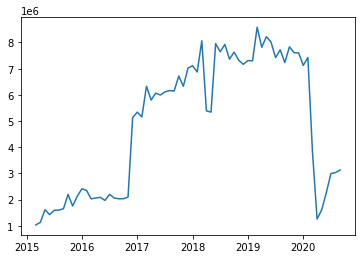

In [66]:
plt.plot(df['REPORTED_YEAR_MONTH'].unique(), df.groupby('REPORTED_YEAR_MONTH').NUMBER_OF_TRIPS.sum())

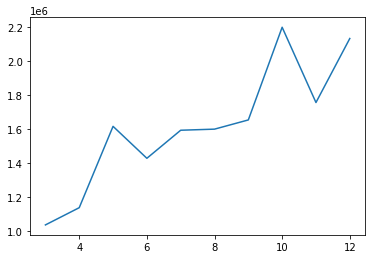

In [67]:
plt.plot(df[df.REPORTED_YEAR == 2015]['REPORTED_MONTH'].unique() + 1, df[df.REPORTED_YEAR == 2015].groupby('REPORTED_YEAR_MONTH').NUMBER_OF_TRIPS.sum())

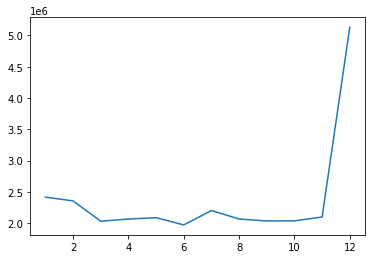

In [68]:
plt.plot(df[df.REPORTED_YEAR == 2016]['REPORTED_MONTH'].unique() + 1, df[df.REPORTED_YEAR == 2016].groupby('REPORTED_YEAR_MONTH').NUMBER_OF_TRIPS.sum())

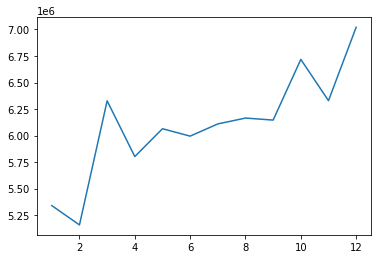

In [69]:
plt.plot(df[df.REPORTED_YEAR == 2017]['REPORTED_MONTH'].unique() + 1, df[df.REPORTED_YEAR == 2017].groupby('REPORTED_YEAR_MONTH').NUMBER_OF_TRIPS.sum())

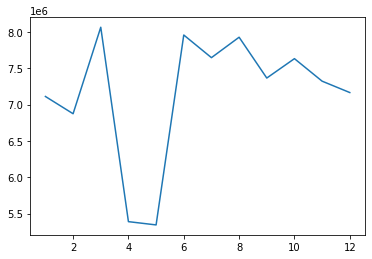

In [70]:
plt.plot(df[df.REPORTED_YEAR == 2018]['REPORTED_MONTH'].unique() + 1, df[df.REPORTED_YEAR == 2018].groupby('REPORTED_YEAR_MONTH').NUMBER_OF_TRIPS.sum())

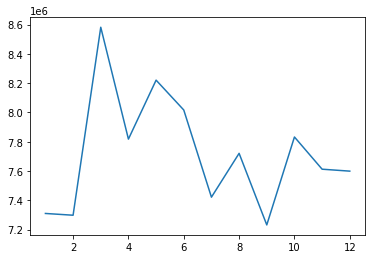

In [71]:
plt.plot(df[df.REPORTED_YEAR == 2019]['REPORTED_MONTH'].unique() + 1, df[df.REPORTED_YEAR == 2019].groupby('REPORTED_YEAR_MONTH').NUMBER_OF_TRIPS.sum())

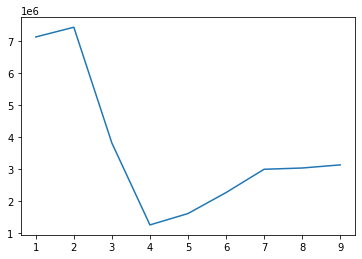

In [72]:
plt.plot(df[df.REPORTED_YEAR == 2020]['REPORTED_MONTH'].unique() + 1, df[df.REPORTED_YEAR == 2020].groupby('REPORTED_YEAR_MONTH').NUMBER_OF_TRIPS.sum())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

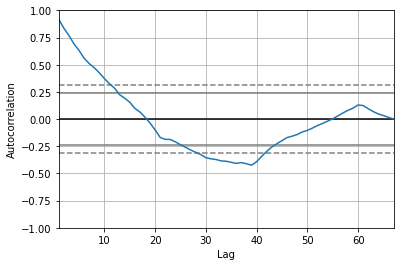

In [73]:
pd.plotting.autocorrelation_plot(df.groupby('REPORTED_YEAR_MONTH').NUMBER_OF_TRIPS.sum())

There is significant autocorrelation for lags 25-42, but correlation more than two years is weird. So, let's check stat test

In [74]:
import statsmodels.api as sm

In [75]:
q_test = sm.tsa.stattools.acf(df.groupby('REPORTED_YEAR_MONTH').NUMBER_OF_TRIPS.sum(), qstat=True, nlags = 40)
print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

        Q-stat        p-value
0    58.928111   1.635391e-14
1   108.508363   2.739734e-24
2   151.193055   1.456786e-32
3   186.196155   3.480161e-39
4   215.815443   1.170139e-44
5   239.475574   7.264841e-49
6   259.525571   2.596691e-52
7   276.947063   3.289281e-55
8   291.316794   1.810844e-57
9   302.526594   4.544309e-59
10  311.189978   3.834771e-60
11  317.961796   7.885051e-61
12  322.246464   5.250567e-61
13  325.465436   5.672908e-61
14  327.567634   1.017876e-60
15  328.443467   3.189980e-60
16  328.829226   1.225029e-59
17  328.857583   5.411362e-59
18  328.993546   2.205851e-58
19  329.993682   5.814354e-58
20  332.894163   6.110769e-58
21  336.460964   4.614846e-58
22  340.169188   3.214794e-58
23  344.914321   1.360153e-58
24  351.060732   2.959394e-59
25  358.685163   3.208217e-60
26  368.036560   1.548364e-61
27  379.151838   3.279429e-63
28  392.146565   2.893636e-65
29  407.922530   6.993965e-68
30  425.098101   8.809885e-71
31  443.336734   6.760619e-74
32  463.47

So, there aren't statistical significant autocorrelation for any lag.

In [76]:
import numpy as np
from pandas.plotting import lag_plot

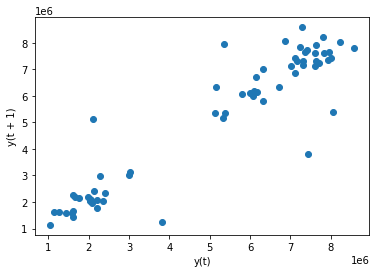

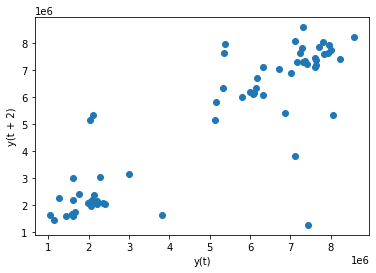

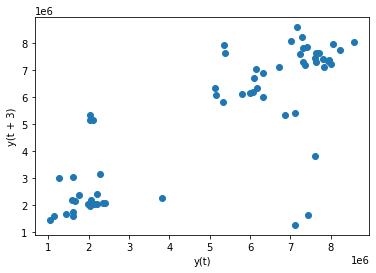

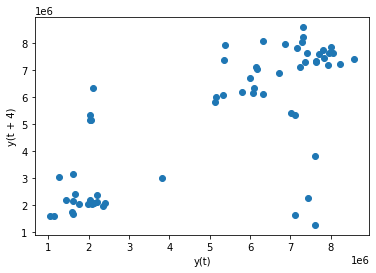

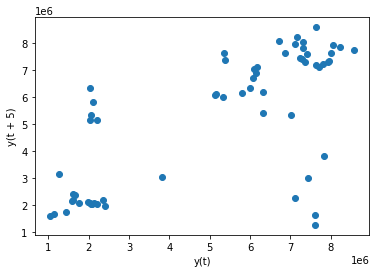

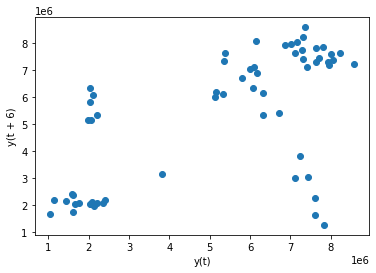

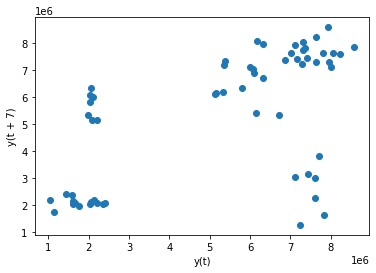

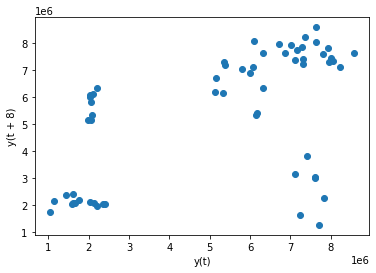

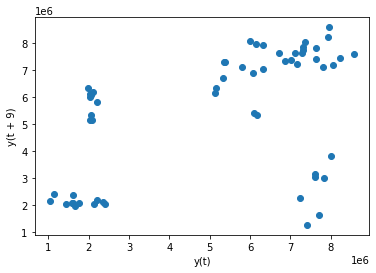

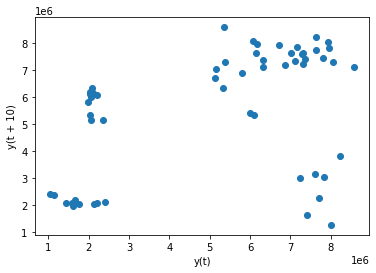

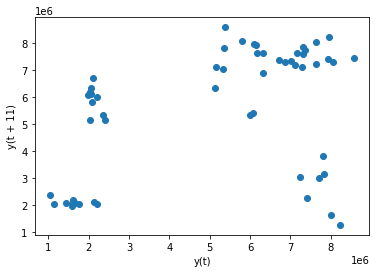

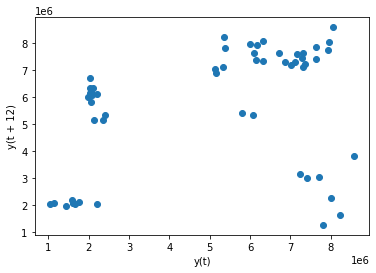

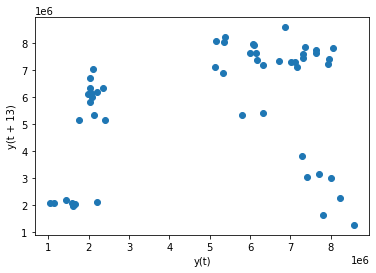

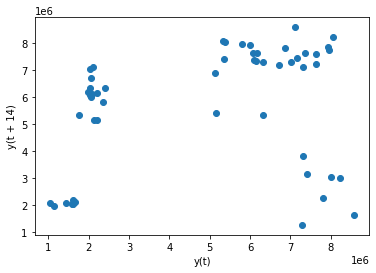

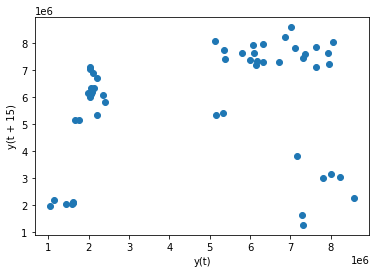

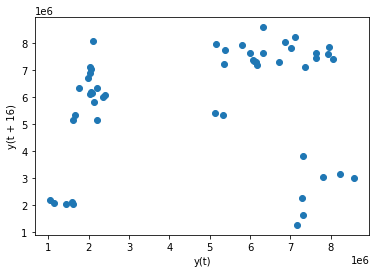

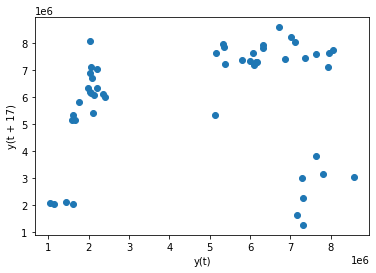

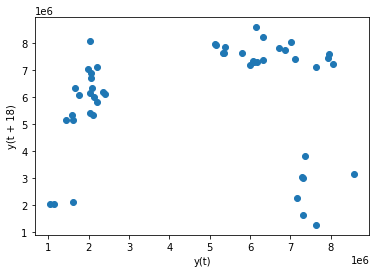

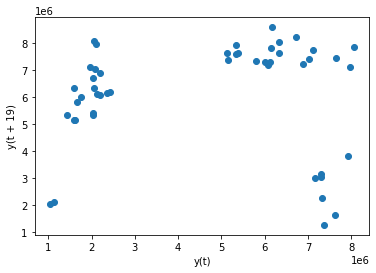

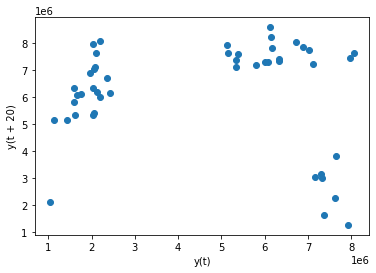

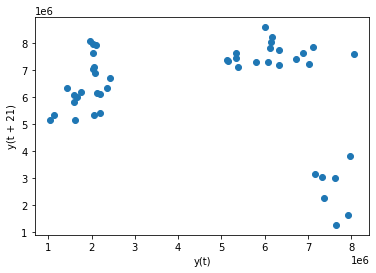

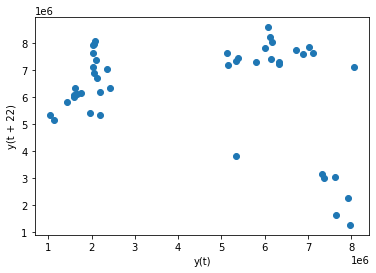

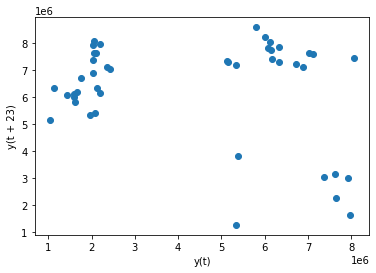

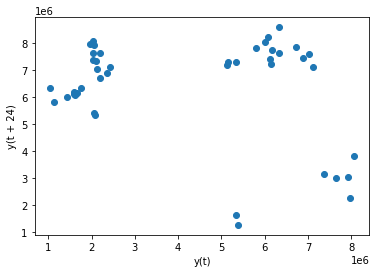

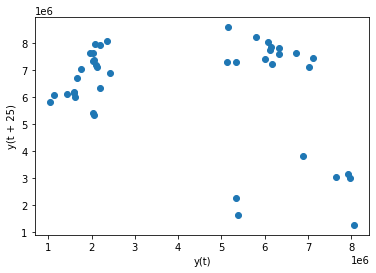

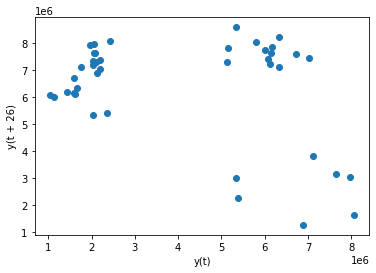

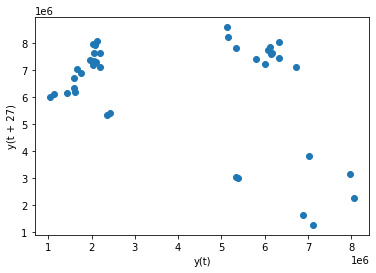

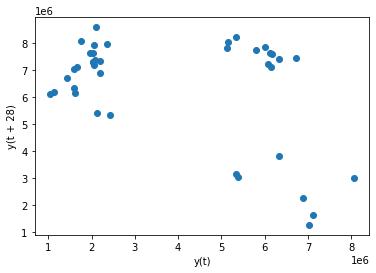

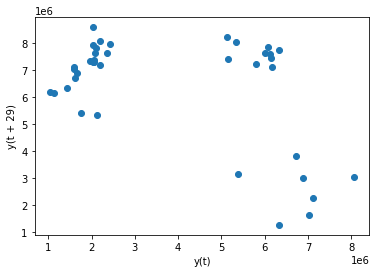

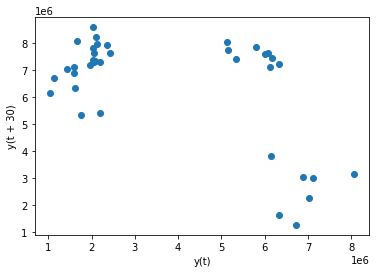

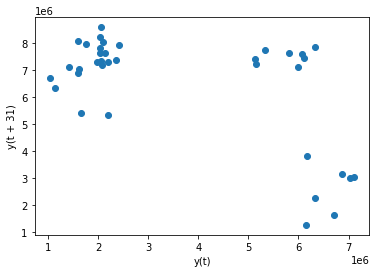

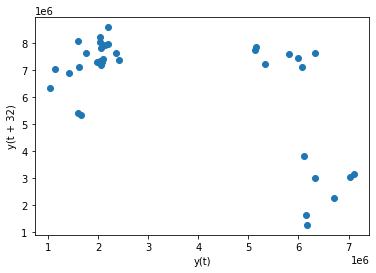

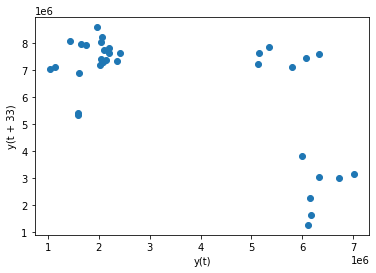

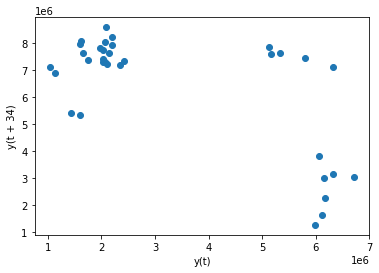

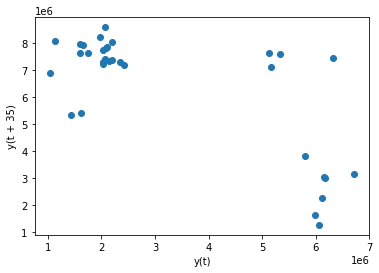

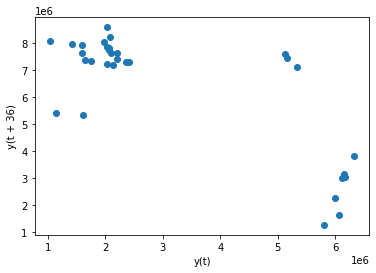

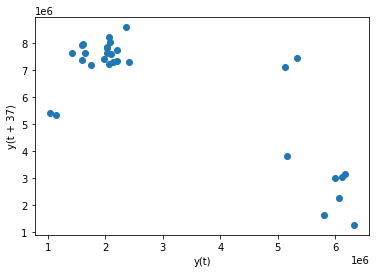

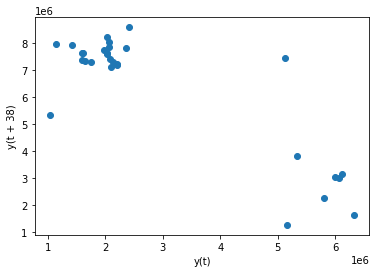

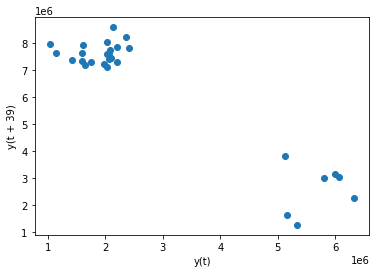

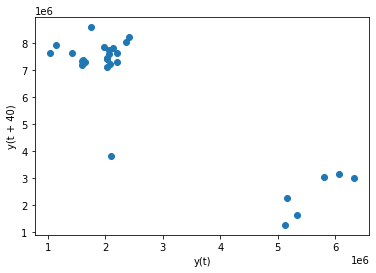

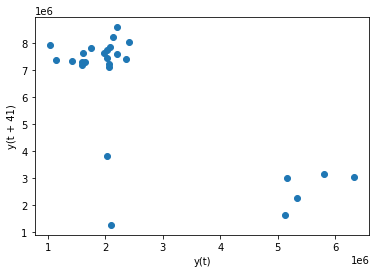

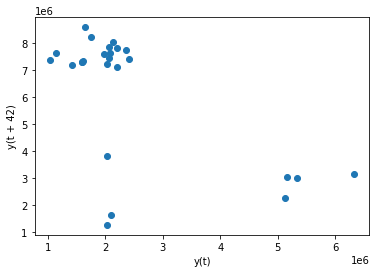

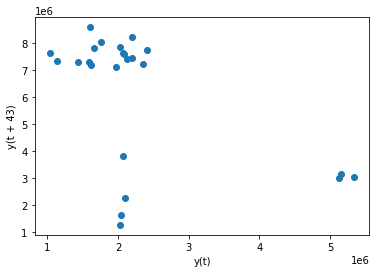

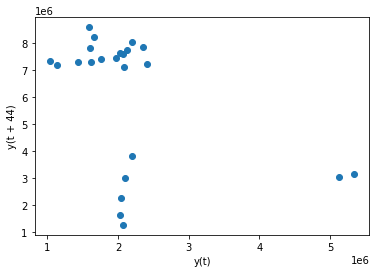

In [77]:
for i in np.arange(1, 45, 1):
    lag_plot(df.groupby('REPORTED_YEAR_MONTH').NUMBER_OF_TRIPS.sum(), lag = i)
    plt.show()

It isn't important, but intresting how count of clouds changes - 2, than 4, than 3

<BarContainer object of 6 artists>

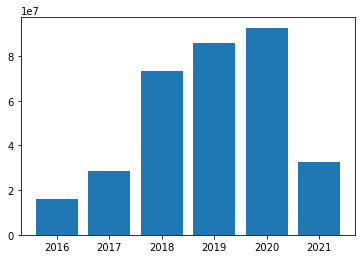

In [78]:
plt.bar(df['REPORTED_YEAR'].unique() + 1, df.groupby('REPORTED_YEAR').NUMBER_OF_TRIPS.sum())

We can see more trips in 2018-2020 years. To my mind, there was some event which caused it, but COVID appeared only in 2019. I didn't find some event on wiki, uber's and lyft's sites in 2017-2018. It could be marketing campaign, some political or social events etc. Maybe, for some reason until 2018 this source couldn't get all data.

In [79]:
df.head()

,REPORTED_YEAR,REPORTED_MONTH,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS,CHANGED_COLOR,R,G,B,RUN_TIME,REPORTED_YEAR_MONTH
0,2015,2,IL,Toyota,Highlander,Black,2010,263,False,black,0.0,0.0,0.0,5,2015.166667
1,2015,2,IL,Toyota,Camry,Black,2008,204,False,black,0.0,0.0,0.0,7,2015.166667
2,2015,2,IL,Toyota,Camry,Black,2009,122,False,black,0.0,0.0,0.0,6,2015.166667
3,2015,2,IL,Mazda,Mazda3,Silver,2012,150,False,silver,192.0,192.0,192.0,3,2015.166667
4,2015,2,IL,Chrysler,Pt Cruiser,White/Pearl,2008,208,False,other,NaN,NaN,NaN,7,2015.166667


In [81]:
from matplotlib.pyplot import figure

<BarContainer object of 51 artists>

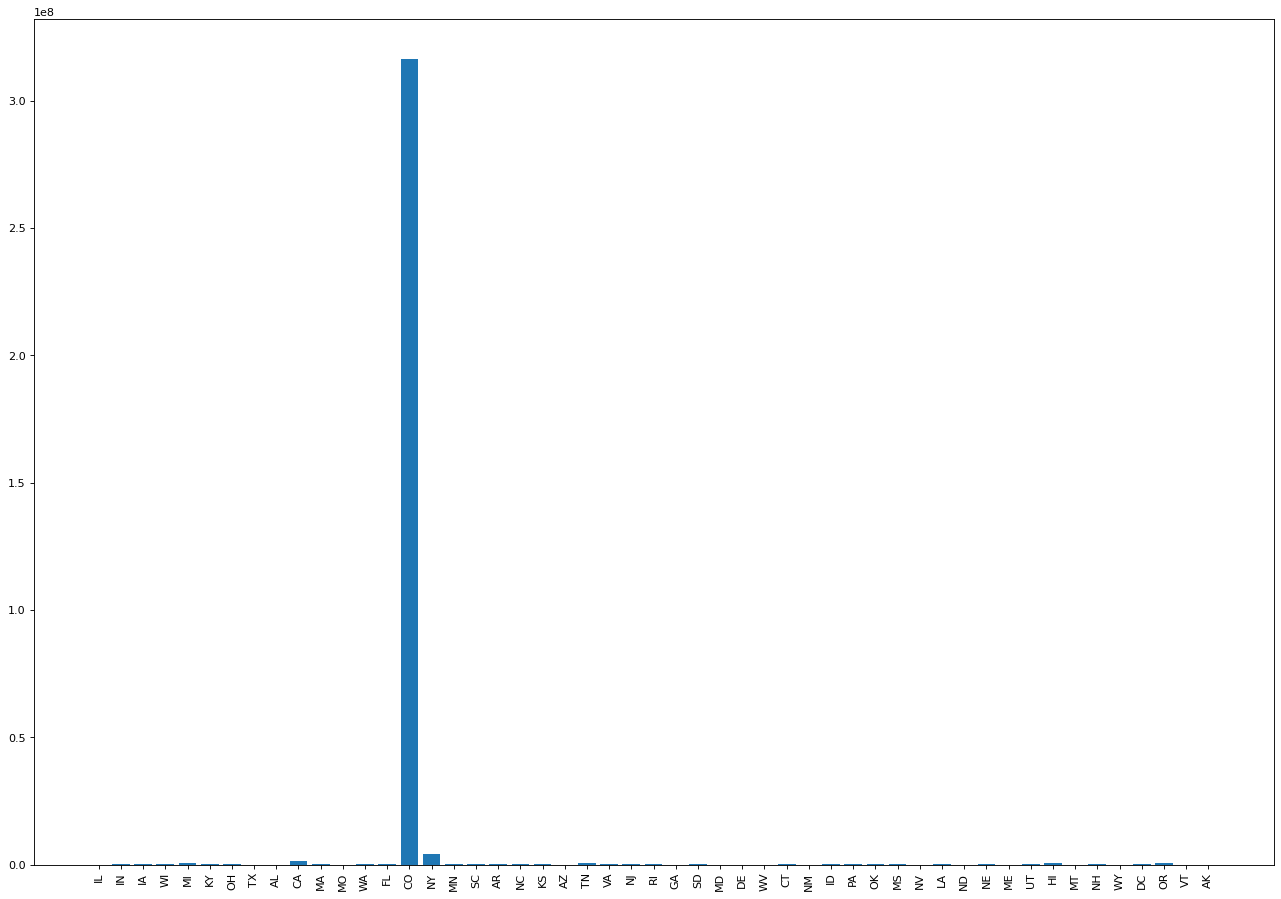

In [82]:
figure(figsize=(20, 14), dpi=80)
plt.xticks(rotation=90)
plt.bar(df.STATE.unique(), df.groupby('STATE').NUMBER_OF_TRIPS.sum())

Here we can see that almost all cars have license plate from one state(CO).

In [83]:
df.groupby('STATE').NUMBER_OF_TRIPS.sum().sort_values(ascending = False)

STATE
IL    316339548
IN      4168601
FL      1381313
WI       714938
TX       637546
CA       599864
MI       491375
GA       398553
OH       377298
MO       302669
IA       274704
PA       255358
NY       219126
CO       185798
VA       180418
TN       170749
KY       167216
LA       160407
AZ       157321
ID       142303
NJ       135757
MD       123572
MN       113115
WA       111783
OK       110373
MA       108785
SC       108701
NC        96318
MS        92708
AL        76002
AR        64048
NV        61864
KS        52265
CT        46384
NE        37934
OR        35160
NM        32709
SD        31387
ND        30462
UT        25098
AK        23303
WV        21873
RI        20326
DE        15612
MT         7812
DC         6741
VT         5908
ME         4959
WY         3129
NH         2483
HI         2403
Name: NUMBER_OF_TRIPS, dtype: int64

<BarContainer object of 2 artists>

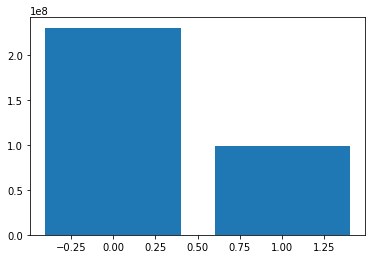

In [84]:
plt.bar(df.MULTIPLE_TNPS.unique(), df.groupby('MULTIPLE_TNPS').NUMBER_OF_TRIPS.sum())

Vehicles that were reported in multiple TNPs in months in +-2.5 times less

In [85]:
df.groupby('MULTIPLE_TNPS').NUMBER_OF_TRIPS.count()

MULTIPLE_TNPS
False    1032764
True      344814
Name: NUMBER_OF_TRIPS, dtype: int64

In [86]:
df.groupby('MULTIPLE_TNPS').NUMBER_OF_TRIPS.sum()

MULTIPLE_TNPS
False    230306048
True      98628031
Name: NUMBER_OF_TRIPS, dtype: int64

Here I was trying to build intresting illustration using RGB features

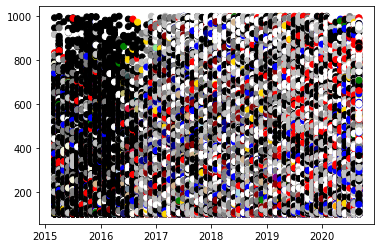

In [87]:
df_filtered = df[df.CHANGED_COLOR != 'other']
plt.scatter(df_filtered.REPORTED_YEAR_MONTH, df_filtered.NUMBER_OF_TRIPS, c = df_filtered.CHANGED_COLOR.apply(lambda x : webcolors.name_to_hex(x)))

Here we can see that to the second part of 2016, black cars were more popular, than gray, white and blue colors became more popular. In the 2020 color distribution became more evenly.

Just make less set for getting result faster

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
df_bigger, df_less = train_test_split(df, test_size = 0.001)

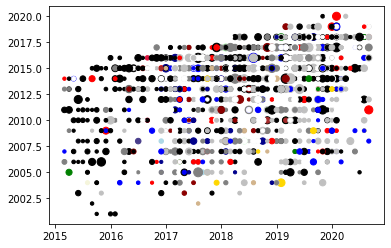

In [90]:
df_filtered = df_less[df_less.CHANGED_COLOR != 'other']
plt.scatter(df_filtered.REPORTED_YEAR_MONTH, df_filtered.MODEL_YEAR, s=df_filtered.NUMBER_OF_TRIPS/10, c = df_filtered.CHANGED_COLOR.apply(lambda x : webcolors.name_to_hex(x)))

In [91]:
from matplotlib.pyplot import figure

In [92]:
df_filtered.groupby(['REPORTED_YEAR_MONTH', 'MODEL_YEAR', 'CHANGED_COLOR'], as_index = False).NUMBER_OF_TRIPS.mean()

,REPORTED_YEAR_MONTH,MODEL_YEAR,CHANGED_COLOR,NUMBER_OF_TRIPS
0,2015.166667,2006,grey,234.000000
1,2015.166667,2007,blue,112.000000
2,2015.166667,2011,black,310.000000
3,2015.166667,2013,grey,162.000000
4,2015.166667,2014,red,112.000000
...,...,...,...,...
1114,2020.666667,2018,black,137.000000
1115,2020.666667,2018,red,243.000000
1116,2020.666667,2018,silver,217.333333
1117,2020.666667,2019,silver,185.000000


One more intresting plot. Here we can see popularity of car colors for different years, also that run time usually less than 16 years

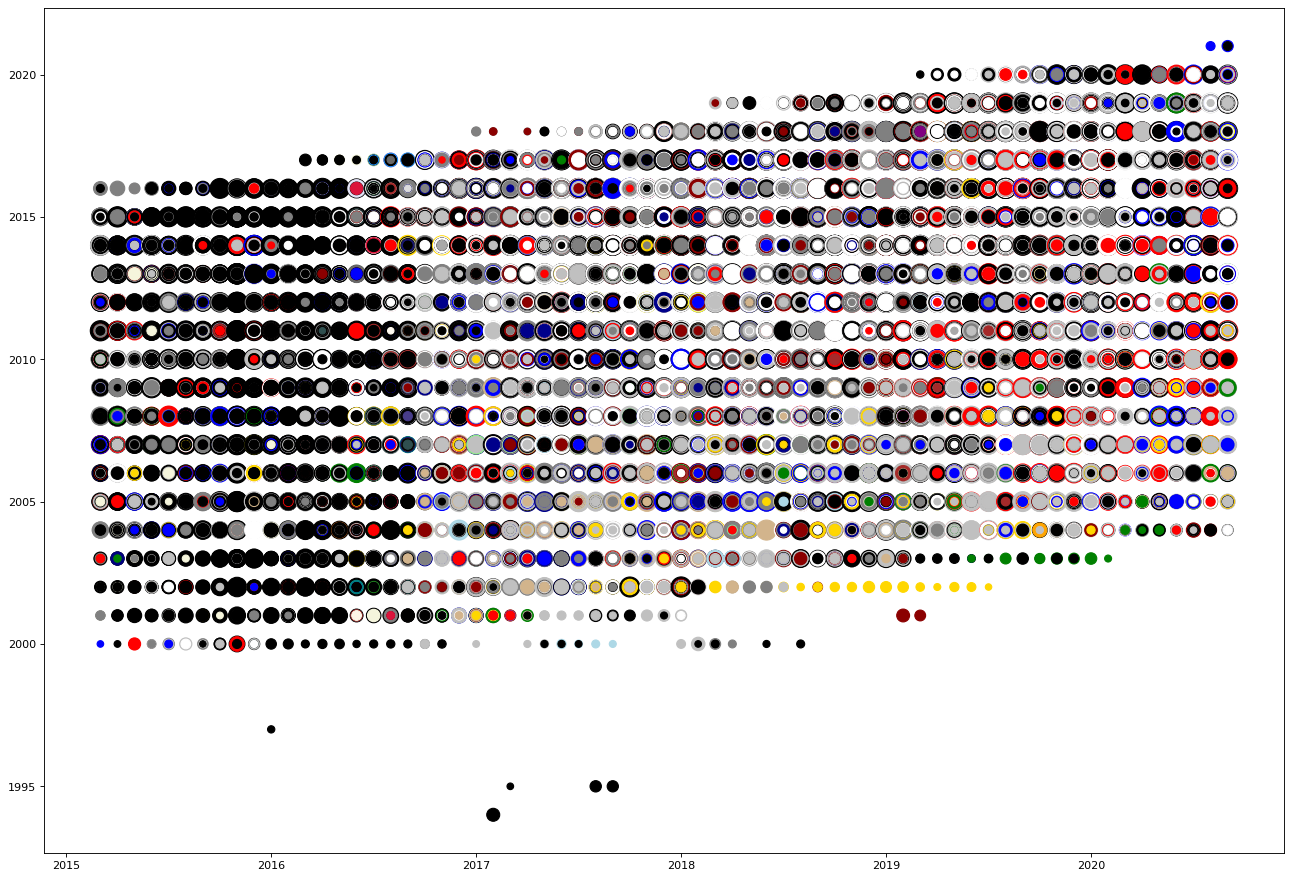

In [93]:
df_filtered = df[df.CHANGED_COLOR != 'other']
figure(figsize=(20, 14), dpi=80)
plt.scatter(df_filtered.REPORTED_YEAR_MONTH, df_filtered.MODEL_YEAR, s=df_filtered.NUMBER_OF_TRIPS/3, c = df_filtered.CHANGED_COLOR.apply(lambda x : webcolors.name_to_hex(x)))

In [94]:
df_filtered.groupby(['REPORTED_YEAR_MONTH', 'MODEL_YEAR', 'CHANGED_COLOR'], as_index = False).NUMBER_OF_TRIPS.mean()

,REPORTED_YEAR_MONTH,MODEL_YEAR,CHANGED_COLOR,NUMBER_OF_TRIPS
0,2015.166667,2000,blue,105.000000
1,2015.166667,2001,beige,201.000000
2,2015.166667,2001,black,158.000000
3,2015.166667,2001,grey,214.000000
4,2015.166667,2001,silver,149.000000
...,...,...,...,...
17460,2020.666667,2020,white,246.141509
17461,2020.666667,2020,yellow,134.000000
17462,2020.666667,2021,black,190.000000
17463,2020.666667,2021,blue,303.000000


one more plot about count of trips and colors

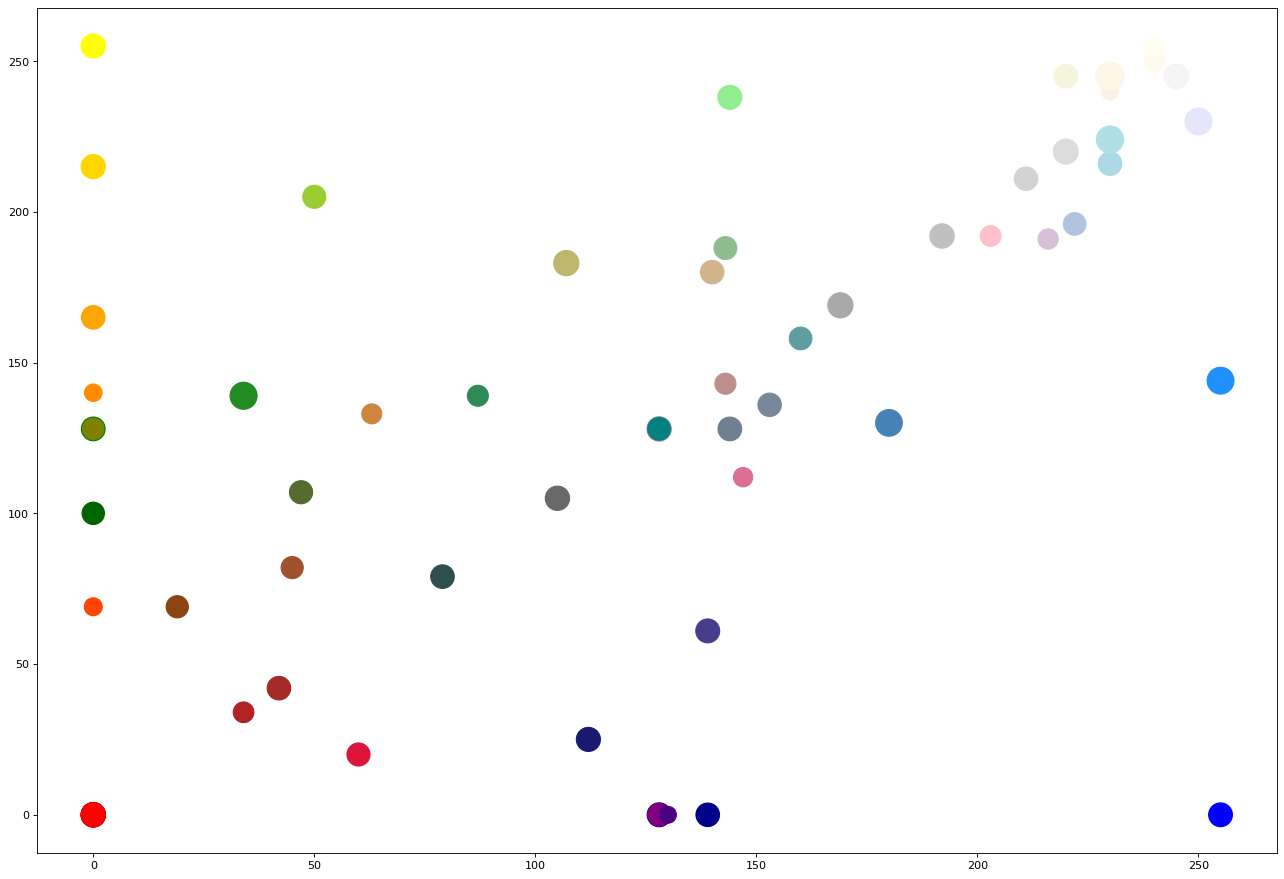

In [95]:
df_filtered = df[df.CHANGED_COLOR != 'other'].groupby(['B', 'G', 'CHANGED_COLOR'], as_index = False).NUMBER_OF_TRIPS.mean()
figure(figsize=(20, 14), dpi=80)
plt.scatter(df_filtered.B, df_filtered.G, s=df_filtered.NUMBER_OF_TRIPS*2, c = df_filtered.CHANGED_COLOR.apply(lambda x : webcolors.name_to_hex(x)))

and 3d one

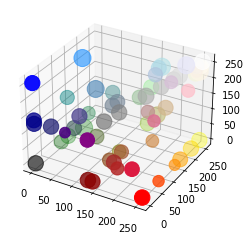

<Figure size 2880x2016 with 0 Axes>

In [96]:
df_filtered = df[df.CHANGED_COLOR != 'other'].groupby(['R','G','B','CHANGED_COLOR'], as_index = False).NUMBER_OF_TRIPS.mean()
ax = plt.axes(projection='3d')
figure(figsize=(40, 28))
ax.scatter3D(df_filtered.R, df_filtered.G, df_filtered.B, s=df_filtered.NUMBER_OF_TRIPS, c = df_filtered.CHANGED_COLOR.apply(lambda x : webcolors.name_to_hex(x)))

In [97]:
df[df.CHANGED_COLOR == 'black'].groupby(['REPORTED_YEAR','CHANGED_COLOR'], as_index = False).NUMBER_OF_TRIPS.mean()

,REPORTED_YEAR,CHANGED_COLOR,NUMBER_OF_TRIPS
0,2015,black,222.999460
1,2016,black,218.188577
2,2017,black,235.926328
3,2018,black,246.576267
4,2019,black,249.332453
5,2020,black,237.051429


This one will be more clear

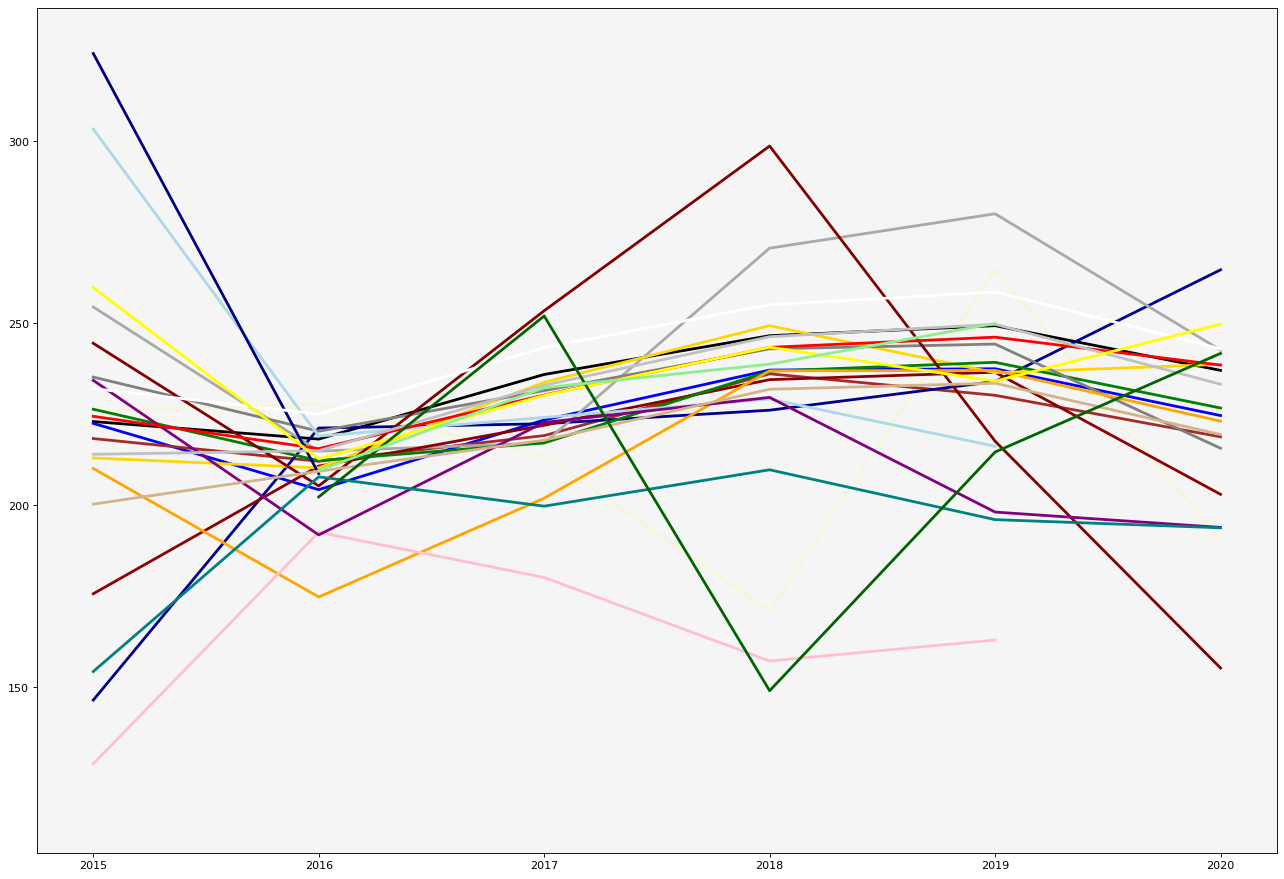

In [98]:
df_filtered = df[df.CHANGED_COLOR != 'other'].groupby(['REPORTED_YEAR','CHANGED_COLOR'], as_index = False).NUMBER_OF_TRIPS.mean()
figure(figsize=(20, 14), dpi=80)
ax = plt.axes()
ax.set_facecolor("whitesmoke")
for col in df_filtered.CHANGED_COLOR.unique():
    plt.plot(df_filtered[df_filtered.CHANGED_COLOR == col].REPORTED_YEAR, df_filtered[df_filtered.CHANGED_COLOR == col].NUMBER_OF_TRIPS, \
             color = webcolors.name_to_hex(col), label = col, linewidth = 2.5)

In [99]:
df.head()

,REPORTED_YEAR,REPORTED_MONTH,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS,CHANGED_COLOR,R,G,B,RUN_TIME,REPORTED_YEAR_MONTH
0,2015,2,IL,Toyota,Highlander,Black,2010,263,False,black,0.0,0.0,0.0,5,2015.166667
1,2015,2,IL,Toyota,Camry,Black,2008,204,False,black,0.0,0.0,0.0,7,2015.166667
2,2015,2,IL,Toyota,Camry,Black,2009,122,False,black,0.0,0.0,0.0,6,2015.166667
3,2015,2,IL,Mazda,Mazda3,Silver,2012,150,False,silver,192.0,192.0,192.0,3,2015.166667
4,2015,2,IL,Chrysler,Pt Cruiser,White/Pearl,2008,208,False,other,NaN,NaN,NaN,7,2015.166667


Removing Mercedes-Benz duplicates

In [100]:
df.MAKE.unique()

array(['Toyota', 'Mazda', 'Chrysler', 'Nissan', 'Audi', 'Ford',
       'Chevrolet', 'Hyundai', 'Pontiac', 'Honda', 'Cadillac', 'Bmw',
       'Acura', 'Dodge', 'Kia', 'Jeep', 'Volkswagen', 'Lexus',
       'Mitsubishi', 'Suzuki', 'Lincoln', 'Subaru', 'Saturn',
       'Land Rover', 'Buick', 'Infiniti', 'Mercedes-Benz', 'Scion',
       'Saab', 'Byd', 'Gmc', 'Mercury', 'Jaguar', 'Mini', 'Volvo',
       'Hummer', 'Tesla', 'Fiat', 'Oldsmobile', 'Ram', 'Isuzu', 'Porsche',
       'Mercedesbenz', 'Chevy', 'Mercedes', 'Ram Trucks', 'Genesis',
       'Am General', 'Mv Agusta', 'Alfa Romeo', 'Mercedes Benz'],
      dtype=object)

In [101]:
df.MAKE.apply(lambda x : x.replace('Benz', '').replace('benz', '').replace(' ', '')).unique()

array(['Toyota', 'Mazda', 'Chrysler', 'Nissan', 'Audi', 'Ford',
       'Chevrolet', 'Hyundai', 'Pontiac', 'Honda', 'Cadillac', 'Bmw',
       'Acura', 'Dodge', 'Kia', 'Jeep', 'Volkswagen', 'Lexus',
       'Mitsubishi', 'Suzuki', 'Lincoln', 'Subaru', 'Saturn', 'LandRover',
       'Buick', 'Infiniti', 'Mercedes-', 'Scion', 'Saab', 'Byd', 'Gmc',
       'Mercury', 'Jaguar', 'Mini', 'Volvo', 'Hummer', 'Tesla', 'Fiat',
       'Oldsmobile', 'Ram', 'Isuzu', 'Porsche', 'Mercedes', 'Chevy',
       'RamTrucks', 'Genesis', 'AmGeneral', 'MvAgusta', 'AlfaRomeo'],
      dtype=object)

In [102]:
df['MAKE'] = df.MAKE.apply(lambda x : x.replace('Benz', '').replace('benz', '').replace(' ', ''))

Count of cars with different MAKE

<BarContainer object of 49 artists>

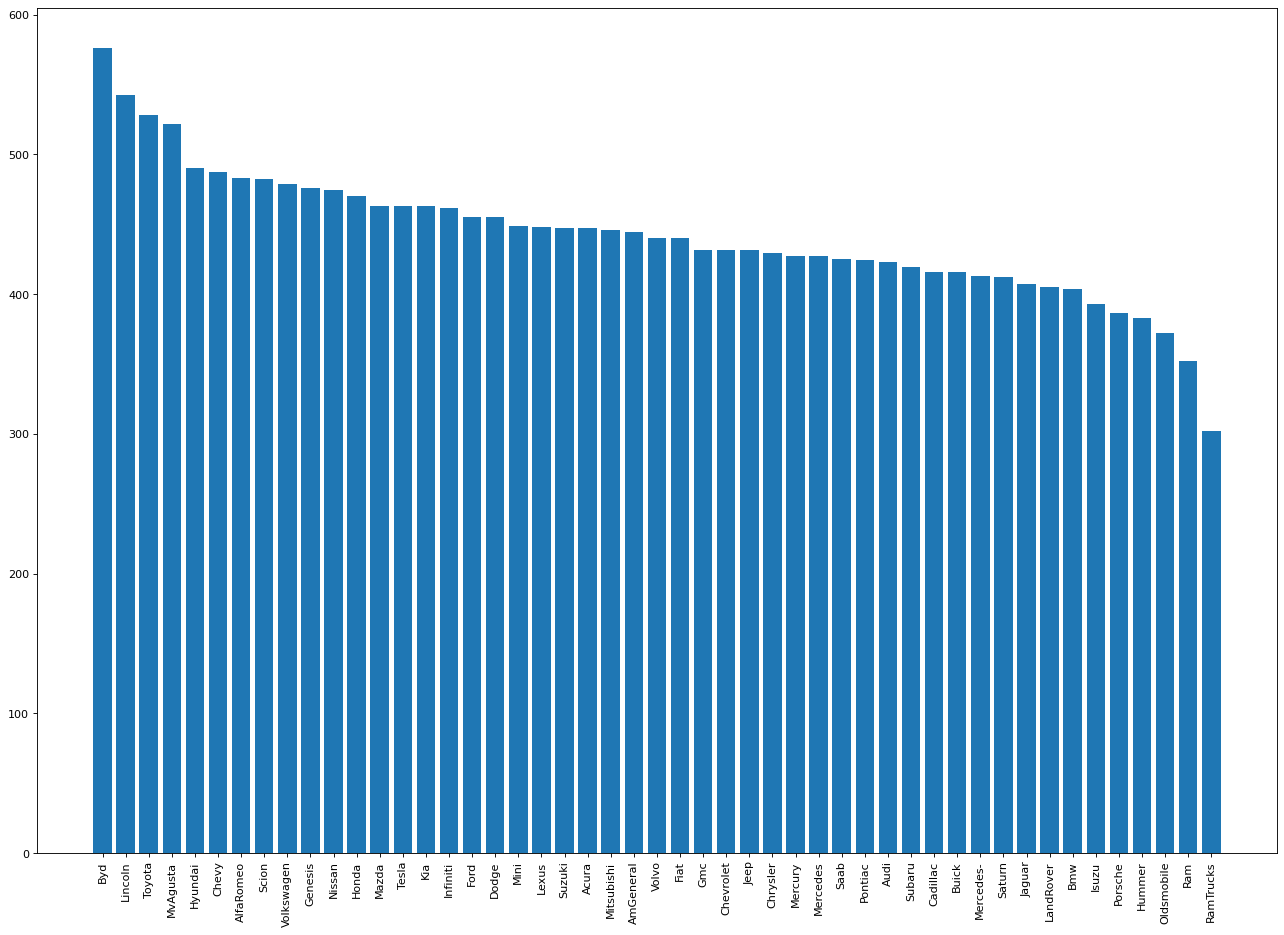

In [103]:
df_filtered = df.groupby(['MAKE'], as_index = False).NUMBER_OF_TRIPS.mean().sort_values('NUMBER_OF_TRIPS', ascending = False)
figure(figsize=(20, 14), dpi=80)
plt.xticks(rotation=90)
plt.bar(df_filtered.MAKE, df_filtered.NUMBER_OF_TRIPS*2)

<BarContainer object of 49 artists>

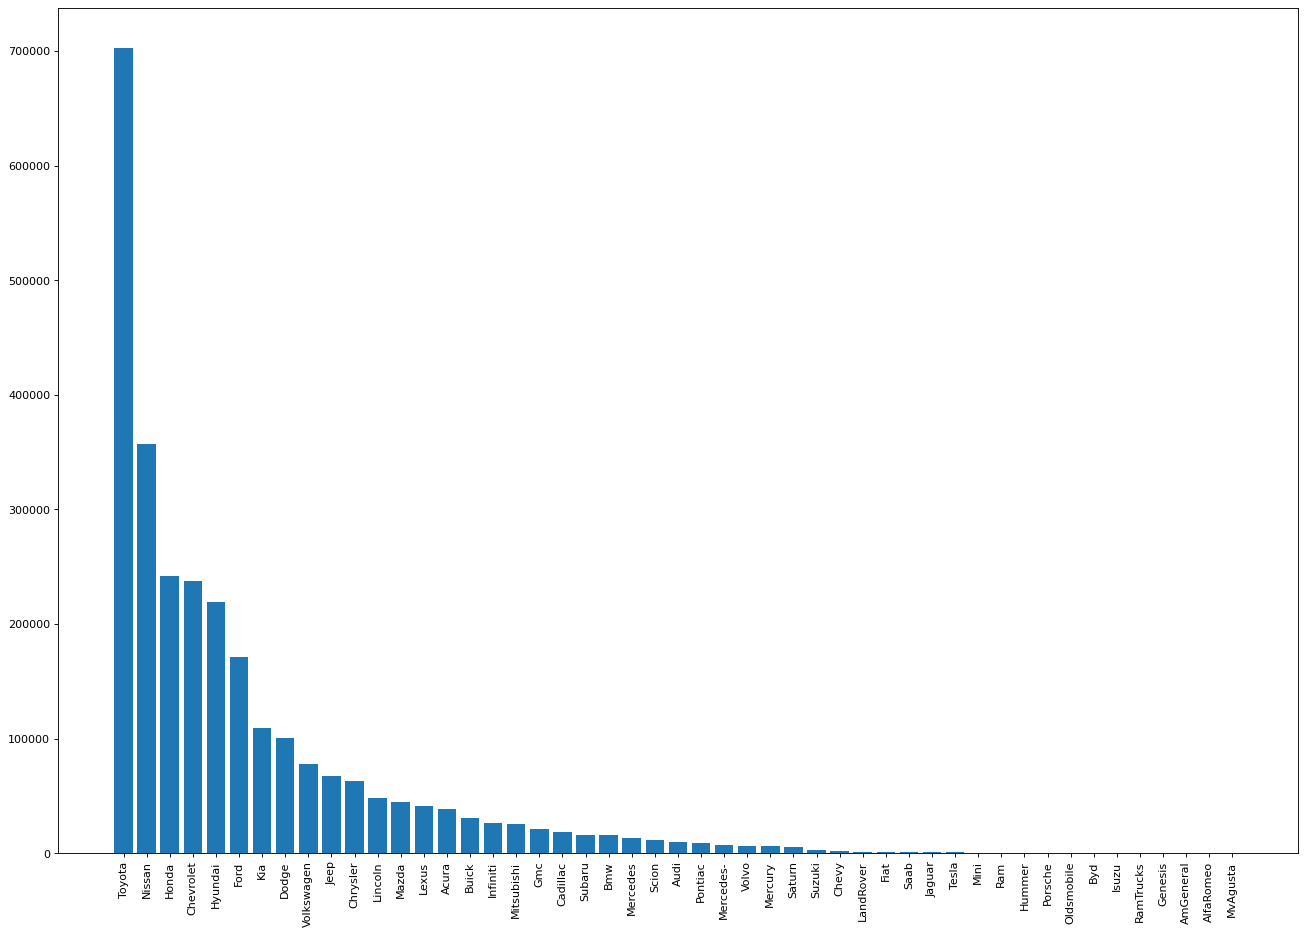

In [104]:
df_filtered = df.groupby(['MAKE'], as_index = False).NUMBER_OF_TRIPS.count().sort_values('NUMBER_OF_TRIPS', ascending = False)
figure(figsize=(20, 14), dpi=80)
plt.xticks(rotation=90)
plt.bar(df_filtered.MAKE, df_filtered.NUMBER_OF_TRIPS*2)

So, here a lot of rare cases and it's better to change them into 'other'

Here we can see how much data we will delete if take filter NUMBER_OF_TRIPS > 1000

<BarContainer object of 49 artists>

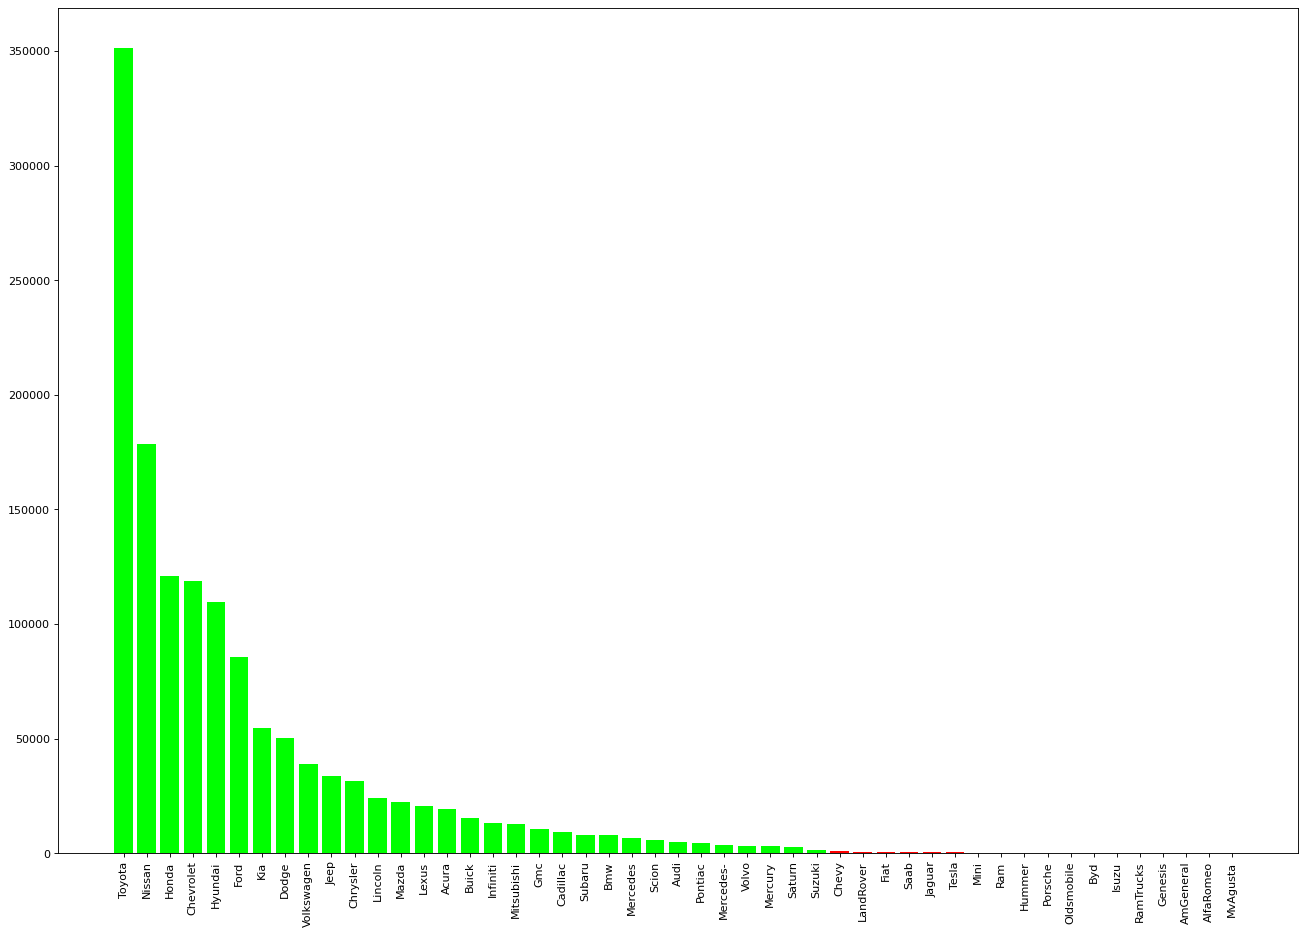

In [105]:
df_filtered = df.groupby(['MAKE'], as_index = False).NUMBER_OF_TRIPS.count().sort_values('NUMBER_OF_TRIPS', ascending = False)
df_filtered['G100'] = df_filtered.NUMBER_OF_TRIPS > 1000
figure(figsize=(20, 14), dpi=80)
plt.xticks(rotation=90)
plt.bar(df_filtered.MAKE, df_filtered.NUMBER_OF_TRIPS, color = df_filtered.G100.apply(lambda x: (0, 1, 0) if x else (1, 0, 0)))

In [106]:
df.groupby(['MAKE'], as_index = False).NUMBER_OF_TRIPS.count().sort_values('NUMBER_OF_TRIPS', ascending = False).NUMBER_OF_TRIPS.quantile(0.366)

1081.6239999999993

Filtering MAKE

In [107]:
make_sort = df.groupby(['MAKE'], as_index = False).NUMBER_OF_TRIPS.count().sort_values('NUMBER_OF_TRIPS', ascending = False)
make_sort = make_sort[make_sort.NUMBER_OF_TRIPS > 1000]

In [108]:
make_sort

,MAKE,NUMBER_OF_TRIPS
46,Toyota,351366
34,Nissan,178602
16,Honda,121011
8,Chevrolet,118649
18,Hyundai,109430
13,Ford,85505
23,Kia,54554
11,Dodge,50241
47,Volkswagen,39136
22,Jeep,33758


In [109]:
np.array(make_sort.MAKE)

array(['Toyota', 'Nissan', 'Honda', 'Chevrolet', 'Hyundai', 'Ford', 'Kia',
       'Dodge', 'Volkswagen', 'Jeep', 'Chrysler', 'Lincoln', 'Mazda',
       'Lexus', 'Acura', 'Buick', 'Infiniti', 'Mitsubishi', 'Gmc',
       'Cadillac', 'Subaru', 'Bmw', 'Mercedes', 'Scion', 'Audi',
       'Pontiac', 'Mercedes-', 'Volvo', 'Mercury', 'Saturn', 'Suzuki'],
      dtype=object)

In [110]:
df[df.MAKE.isin(np.array(make_sort.MAKE))].MAKE.unique()

array(['Toyota', 'Mazda', 'Chrysler', 'Nissan', 'Audi', 'Ford',
       'Chevrolet', 'Hyundai', 'Pontiac', 'Honda', 'Cadillac', 'Bmw',
       'Acura', 'Dodge', 'Kia', 'Jeep', 'Volkswagen', 'Lexus',
       'Mitsubishi', 'Suzuki', 'Lincoln', 'Subaru', 'Saturn', 'Buick',
       'Infiniti', 'Mercedes-', 'Scion', 'Gmc', 'Mercury', 'Volvo',
       'Mercedes'], dtype=object)

In [111]:
df.loc[~df.MAKE.isin(np.array(make_sort.MAKE)),'MAKE'] = 'Other'

In [112]:
df.MAKE.unique()

array(['Toyota', 'Mazda', 'Chrysler', 'Nissan', 'Audi', 'Ford',
       'Chevrolet', 'Hyundai', 'Pontiac', 'Honda', 'Cadillac', 'Bmw',
       'Acura', 'Dodge', 'Kia', 'Jeep', 'Volkswagen', 'Lexus',
       'Mitsubishi', 'Suzuki', 'Lincoln', 'Subaru', 'Saturn', 'Other',
       'Buick', 'Infiniti', 'Mercedes-', 'Scion', 'Gmc', 'Mercury',
       'Volvo', 'Mercedes'], dtype=object)

<BarContainer object of 32 artists>

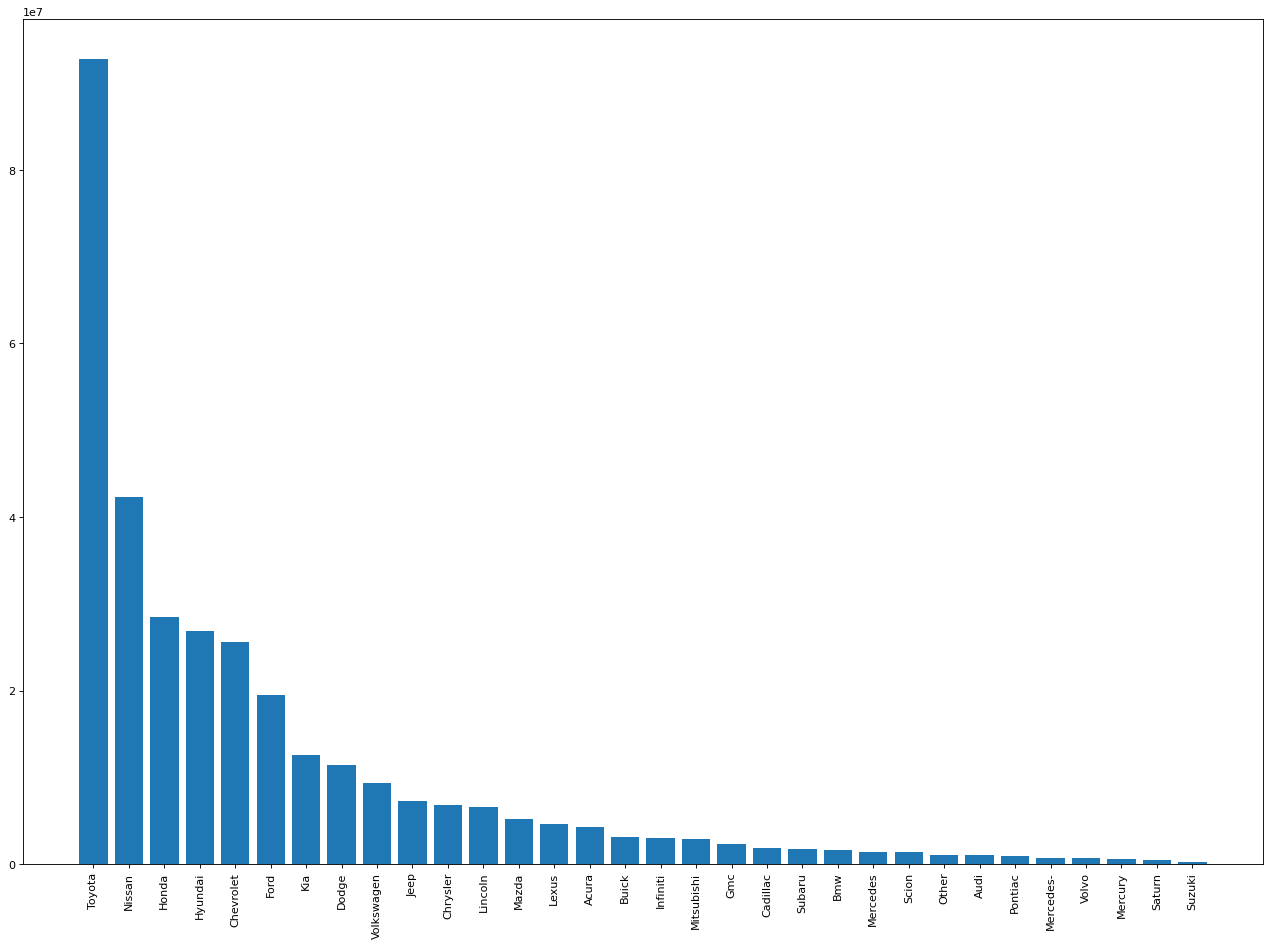

In [113]:
df_filtered = df.groupby(['MAKE'], as_index = False).NUMBER_OF_TRIPS.sum().sort_values('NUMBER_OF_TRIPS', ascending = False)
figure(figsize=(20, 14), dpi=80)
plt.xticks(rotation=90)
plt.bar(df_filtered.MAKE, df_filtered.NUMBER_OF_TRIPS)

Let's make the same for MODEL.

<BarContainer object of 645 artists>

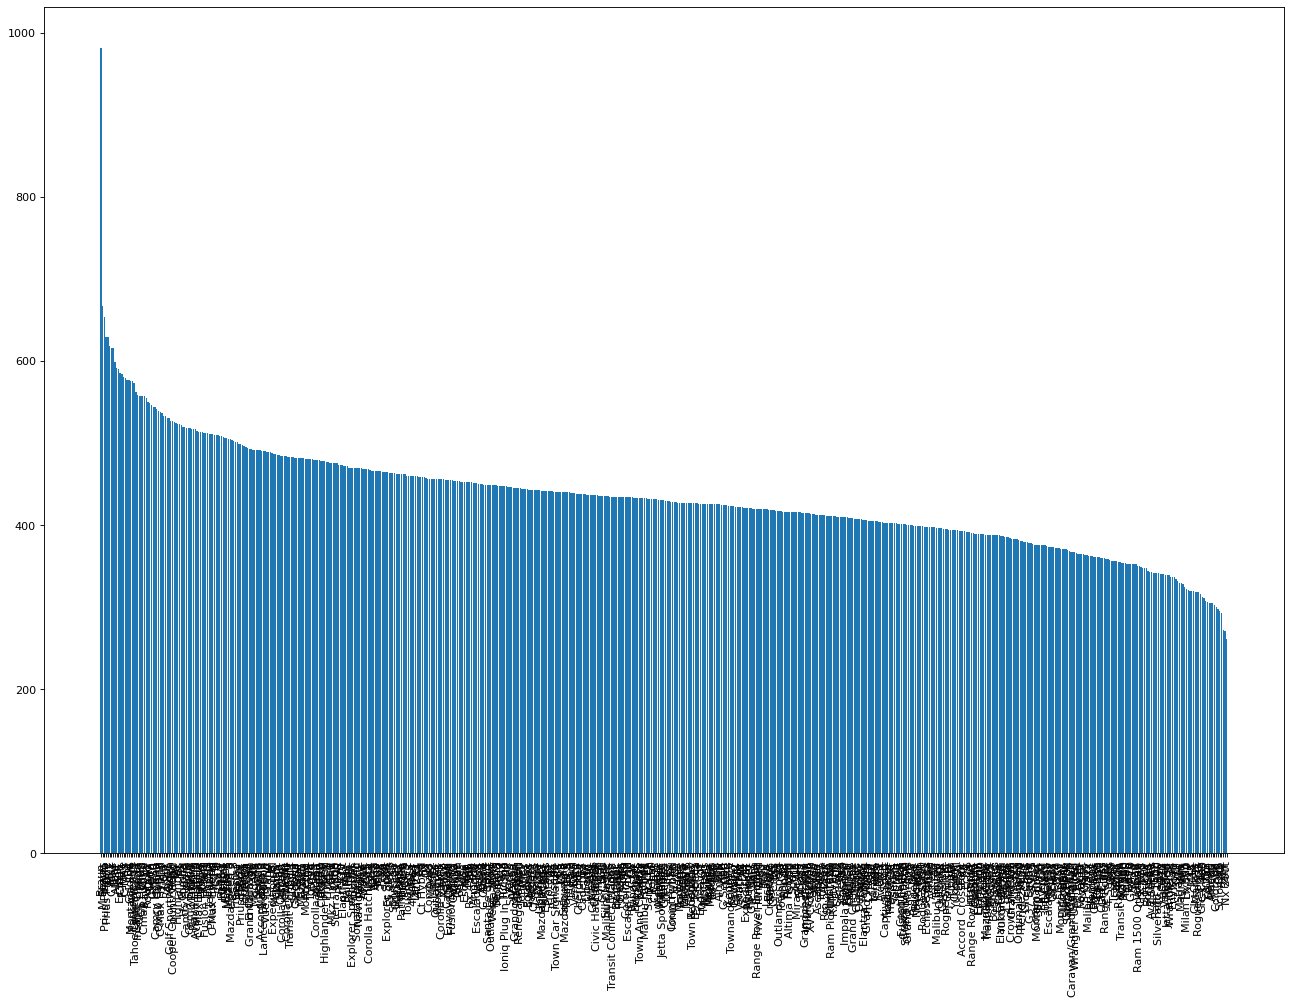

In [114]:
df_filtered = df.groupby(['MODEL'], as_index = False).NUMBER_OF_TRIPS.mean().sort_values('NUMBER_OF_TRIPS', ascending = False)
figure(figsize=(20, 14), dpi=80)
plt.xticks(rotation=90)
plt.bar(df_filtered.MODEL, df_filtered.NUMBER_OF_TRIPS*2)

Unique values of MODEL much more than for MAKE

In [115]:
np.sort(df.MODEL.unique())

array(['1500', '2', '200', '3', '3 Series', '3-Series', '300',
       '300-Class', '300m', '323', '350-Class', '3series', '4 Series',
       '4-Runner', '40788', '42250', '42252', '4runner', '5', '5 Series',
       '5-Series', '500', '500l', '500x', '5series', '6', '626',
       '7 Series', '7-Series', '7series', '9 3', '9-3', '9-5', '9-7x',
       '93', '95', '97x', 'A3', 'A4', 'A6', 'A8', 'A8 L', 'Acadia',
       'Accent', 'Accord', 'Accord Crosstour', 'Accord Hybrid', 'Ad',
       'Aerio', 'Agile', 'Agya', 'Alero', 'Allex', 'Allure', 'Almera',
       'Altima', 'Altima Hybrid', 'Amanti', 'Armada', 'Ascender',
       'Ascent', 'Aspen', 'Astra', 'Atlas', 'Ats', 'Aura', 'Avalanche',
       'Avalon', 'Avalon Hybrid', 'Avenger', 'Aveo', 'Aviator', 'Azera',
       'Aztek', 'B9 Tribeca', 'Blazer', 'Bolt', 'Bonneville', 'Borrego',
       'Braun', 'Bravada', 'Bt50', 'C Class', 'C Hr', 'C Max',
       'C Max Hybrid', 'C-Class', 'C-Hr', 'C-Max', 'C-Max Energi',
       'C-Max Hybrid', 'Cadenza',

With sorting much easier to see duplicates. I decided to remove spaces, '-' and make lower case. Than for qx models remove x

In [116]:
df['MODEL'] = df.MODEL.apply(lambda x: x.lower().replace(' ', '').replace('-', ''))

In [117]:
import re

In [118]:
for model in np.sort(df.MODEL.unique()):
    f = re.findall(r'qx\d+', model)
    if(f):
        print(f)

['qx30']
['qx4']
['qx50']
['qx56']
['qx60']
['qx60']
['qx70']
['qx80']


In [119]:
def changex(model):
    f = re.findall(r'qx\d+', model)
    if(f):
        return model.replace('x', '')
    else:
        return model

In [120]:
np.sort(df.MODEL.apply(changex).unique())

array(['1500', '2', '200', '3', '300', '300class', '300m', '323',
       '350class', '3series', '40788', '42250', '42252', '4runner',
       '4series', '5', '500', '500l', '500x', '5series', '6', '626',
       '7series', '93', '95', '97x', 'a3', 'a4', 'a6', 'a8', 'a8l',
       'acadia', 'accent', 'accord', 'accordcrosstour', 'accordhybrid',
       'ad', 'aerio', 'agile', 'agya', 'alero', 'allex', 'allure',
       'almera', 'altima', 'altimahybrid', 'amanti', 'armada', 'ascender',
       'ascent', 'aspen', 'astra', 'atlas', 'ats', 'aura', 'avalanche',
       'avalon', 'avalonhybrid', 'avenger', 'aveo', 'aviator', 'azera',
       'aztek', 'b9tribeca', 'blazer', 'bolt', 'bonneville', 'borrego',
       'braun', 'bravada', 'bt50', 'cadenza', 'caldina', 'caliber',
       'cami', 'camry', 'camryhybrid', 'camrysolara', 'canyon', 'captiva',
       'captivasport', 'caravan', 'caravan/grandcaravan', 'cavalier',
       'cayenne', 'cc', 'cclass', 'century', 'charger', 'cherokee', 'chr',
       'civ

In [121]:
df['MODEL'] = df.MODEL.apply(changex)

Also visualization of filter.

<BarContainer object of 559 artists>

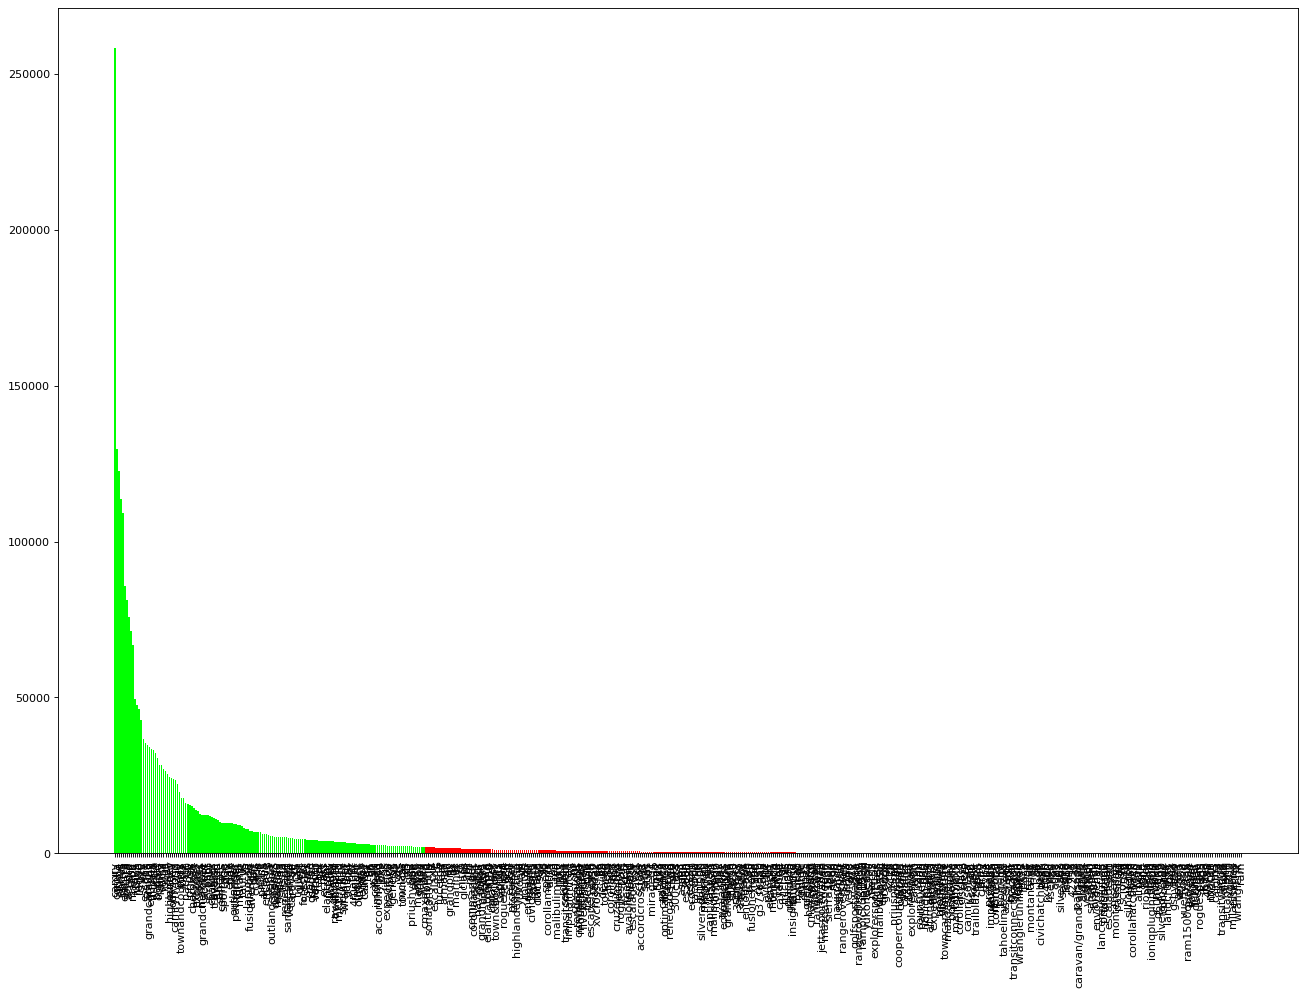

In [122]:
df_filtered = df.groupby(['MODEL'], as_index = False).NUMBER_OF_TRIPS.count().sort_values('NUMBER_OF_TRIPS', ascending = False)
df_filtered['G100'] = df_filtered.NUMBER_OF_TRIPS > 1000
figure(figsize=(20, 14), dpi=80)
plt.xticks(rotation=90)
plt.bar(df_filtered.MODEL, df_filtered.NUMBER_OF_TRIPS*2, color = df_filtered.G100.apply(lambda x: (0, 1, 0) if x else (1, 0, 0)))

Same filter

In [123]:
make_sort = df.groupby(['MODEL'], as_index = False).NUMBER_OF_TRIPS.count().sort_values('NUMBER_OF_TRIPS', ascending = False)
make_sort = make_sort[make_sort.NUMBER_OF_TRIPS > 1000]

In [124]:
make_sort

,MODEL,NUMBER_OF_TRIPS
75,camry,129142
110,corolla,64887
44,altima,61352
366,prius,56870
445,sentra,54599
...,...,...
59,aveo,1087
312,mazda5,1068
155,envoy,1025
554,yukon,1024


In [125]:
df[df.MODEL.isin(np.array(make_sort.MODEL))].MODEL.unique()

array(['highlander', 'camry', 'mazda3', 'sentra', 'avalon', 'a4',
       'fusion', 'malibu', 'sonata', 'corolla', 'equinox', 'prius',
       'impala', 'explorer', 'trailblazer', 'sonic', 'g6', 'civic',
       'sienna', 'tl', 'grandcaravan', 'fiesta', 'cruze', 'cx5', 'hhr',
       'pilot', 'soul', 'accord', 'priusv', 'escape', 'priusc', 'charger',
       'passat', 'altima', 'cobalt', 'fusionhybrid', 'patriot', 'rio',
       '300', 'murano', 'townandcountry', 'rogue', 'rx', 'outlander',
       'traverse', 'mazda6', 'versa', 'rav4', 'is', 'jetta', 'crv', 'mkz',
       'wrangler', 'fit', 'optima', 'camryhybrid', 'focus', 'forester',
       'lacrosse', '200', 'santafe', 'gsedan', 'grandcherokee', 'mdx',
       'cclass', 'caravan', 'elantra', 'xb', 'compass', 'outlandersport',
       'legacy', 'outback', 'tahoe', 'cc', 'odyssey', 'regal', 'es',
       'venza', 'yaris', 'quest', 'cx9', 'matrix', 'journey', 'maxima',
       'cts', 'accent', 'vue', 'terrain', 'trax', 'sedona', 'tucson',
       

In [126]:
df.loc[~df.MODEL.isin(np.array(make_sort.MODEL)),'MODEL'] = 'Other'

Result of filter

<BarContainer object of 155 artists>

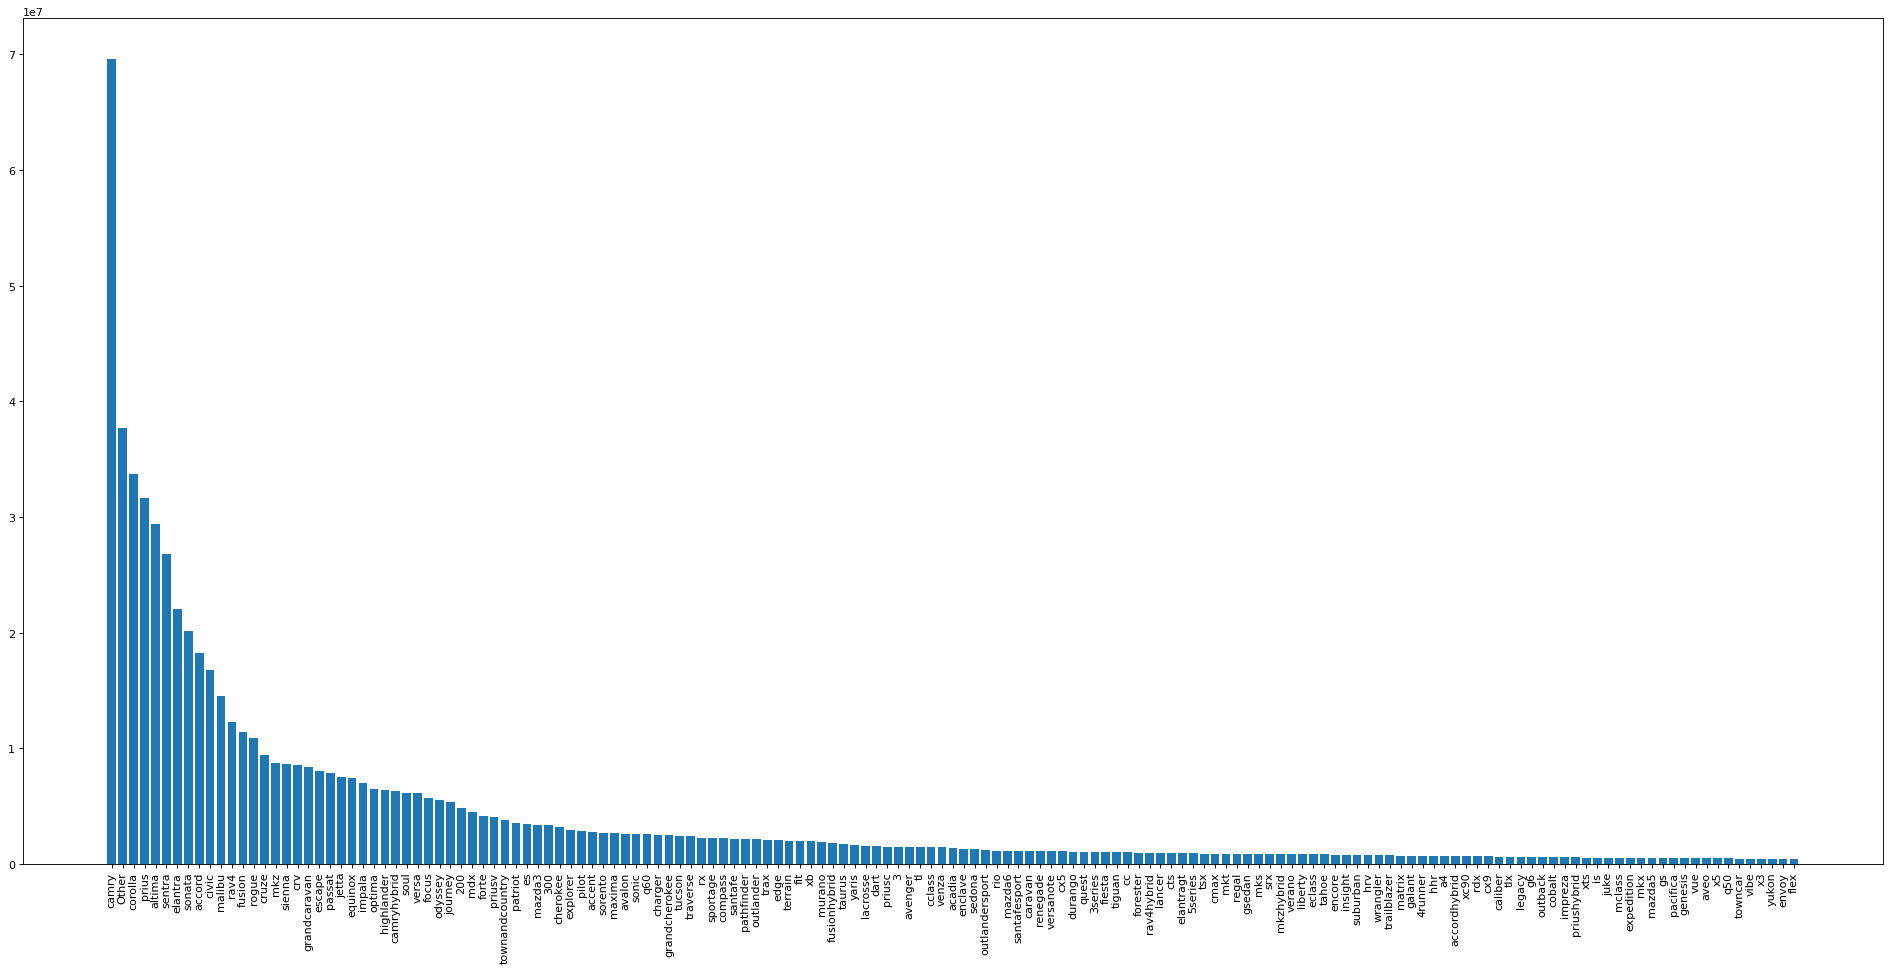

In [127]:
df_filtered = df.groupby(['MODEL'], as_index = False).NUMBER_OF_TRIPS.sum().sort_values('NUMBER_OF_TRIPS', ascending = False)
figure(figsize=(30, 14), dpi=80)
plt.xticks(rotation=90)
plt.bar(df_filtered.MODEL, df_filtered.NUMBER_OF_TRIPS*2)

In [128]:
import matplotlib

<BarContainer object of 51 artists>

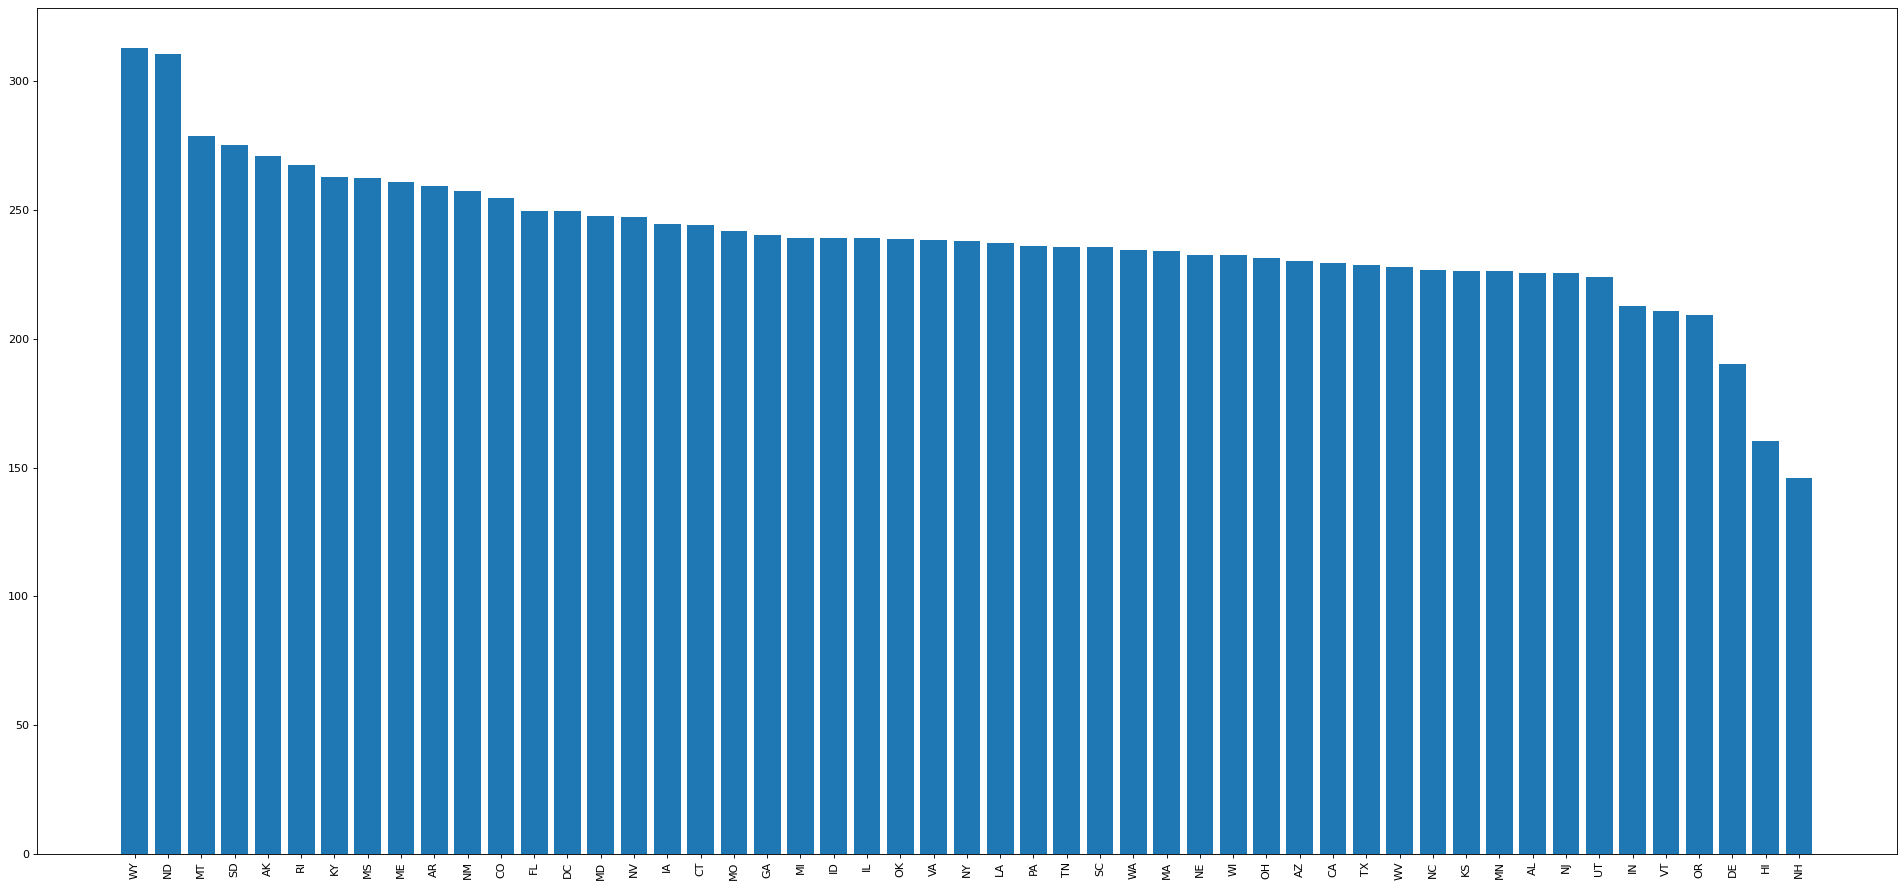

In [129]:
df_filtered = df.groupby(['STATE'], as_index = False).NUMBER_OF_TRIPS.mean().sort_values('NUMBER_OF_TRIPS', ascending = False)
figure(figsize=(30, 14), dpi=80)
plt.xticks(rotation=90)
font = {'family' : 'DejaVu Sans',
        'size'   : 12}

matplotlib.rc('font', **font)
plt.bar(df_filtered.STATE, df_filtered.NUMBER_OF_TRIPS)

+- all drivers with different license plates drives +- same, but if you remember, the most of drivers with CO plate

Month periodic-function encoding

In [130]:
df.REPORTED_MONTH.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1], dtype=int64)

In [131]:
import math

In [132]:
np.sin(2* math.pi *df.REPORTED_MONTH.unique()/df.REPORTED_MONTH.max())

array([ 9.09631995e-01,  9.89821442e-01,  7.55749574e-01,  2.81732557e-01,
       -2.81732557e-01, -7.55749574e-01, -9.89821442e-01, -9.09631995e-01,
       -5.40640817e-01, -1.13310778e-15,  0.00000000e+00,  5.40640817e-01])

In [133]:
df['MONTH'] = df.REPORTED_MONTH.apply(lambda x: np.sin(2* math.pi *x/df.REPORTED_MONTH.max()))

In [134]:
df.MONTH.unique()

array([ 9.09631995e-01,  9.89821442e-01,  7.55749574e-01,  2.81732557e-01,
       -2.81732557e-01, -7.55749574e-01, -9.89821442e-01, -9.09631995e-01,
       -5.40640817e-01, -1.13310778e-15,  0.00000000e+00,  5.40640817e-01])

In [135]:
df.head()

,REPORTED_YEAR,REPORTED_MONTH,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS,CHANGED_COLOR,R,G,B,RUN_TIME,REPORTED_YEAR_MONTH,MONTH
0,2015,2,IL,Toyota,highlander,Black,2010,263,False,black,0.0,0.0,0.0,5,2015.166667,0.909632
1,2015,2,IL,Toyota,camry,Black,2008,204,False,black,0.0,0.0,0.0,7,2015.166667,0.909632
2,2015,2,IL,Toyota,camry,Black,2009,122,False,black,0.0,0.0,0.0,6,2015.166667,0.909632
3,2015,2,IL,Mazda,mazda3,Silver,2012,150,False,silver,192.0,192.0,192.0,3,2015.166667,0.909632
4,2015,2,IL,Chrysler,Other,White/Pearl,2008,208,False,other,NaN,NaN,NaN,7,2015.166667,0.909632


Frequency encoding for categorial features. There are too much unique values and each of them(OneHotEncoding) posibly will not give such benefits

In [136]:
df['MAKE_FREQ_ENCODE'] = df.MAKE.map(df.groupby('MAKE').size()/len(df))

In [137]:
df.head()

,REPORTED_YEAR,REPORTED_MONTH,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS,CHANGED_COLOR,R,G,B,RUN_TIME,REPORTED_YEAR_MONTH,MONTH,MAKE_FREQ_ENCODE
0,2015,2,IL,Toyota,highlander,Black,2010,263,False,black,0.0,0.0,0.0,5,2015.166667,0.909632,0.255061
1,2015,2,IL,Toyota,camry,Black,2008,204,False,black,0.0,0.0,0.0,7,2015.166667,0.909632,0.255061
2,2015,2,IL,Toyota,camry,Black,2009,122,False,black,0.0,0.0,0.0,6,2015.166667,0.909632,0.255061
3,2015,2,IL,Mazda,mazda3,Silver,2012,150,False,silver,192.0,192.0,192.0,3,2015.166667,0.909632,0.016199
4,2015,2,IL,Chrysler,Other,White/Pearl,2008,208,False,other,NaN,NaN,NaN,7,2015.166667,0.909632,0.022878


In [138]:
df.MAKE_FREQ_ENCODE.unique()

array([0.25506069, 0.01619945, 0.02287783, 0.12964928, 0.00352575,
       0.06206908, 0.0861287 , 0.07943652, 0.00323176, 0.0878433 ,
       0.00659854, 0.00582544, 0.01404857, 0.03647053, 0.03960139,
       0.02450533, 0.02840928, 0.0149487 , 0.00935192, 0.00088489,
       0.01748939, 0.00592199, 0.00181913, 0.00359326, 0.01105854,
       0.00954356, 0.00251311, 0.00419432, 0.00777161, 0.00222927,
       0.00228662, 0.00491224])

In [139]:
df['STATE_FREQ_ENCODE'] = df.STATE.map(df.groupby('STATE').size()/len(df))

In [140]:
df.STATE_FREQ_ENCODE.unique()

array([9.60165595e-01, 1.42155290e-02, 8.15198849e-04, 2.23145259e-03,
       1.49029674e-03, 4.61679847e-04, 1.18396200e-03, 2.02529367e-03,
       2.44632246e-04, 1.89898503e-03, 3.37548945e-04, 9.08115548e-04,
       3.46259885e-04, 4.01356584e-03, 5.29189636e-04, 6.68564684e-04,
       3.62955854e-04, 3.34645298e-04, 1.79300192e-04, 3.08512476e-04,
       1.67685605e-04, 4.95797697e-04, 5.25560077e-04, 5.49515164e-04,
       4.36998849e-04, 5.51692899e-05, 1.20283570e-03, 8.27539348e-05,
       3.62229943e-04, 5.95247601e-05, 6.96875240e-05, 1.37923225e-04,
       9.21907870e-05, 4.31917467e-04, 7.85436469e-04, 3.35371209e-04,
       2.56246833e-04, 1.81477927e-04, 4.90716315e-04, 7.11393475e-05,
       1.18323609e-04, 1.37923225e-05, 8.13021114e-05, 1.08886756e-05,
       2.03255278e-05, 1.23404990e-05, 7.25911709e-06, 1.95996161e-05,
       1.21953167e-04, 6.24284070e-05])

In [141]:
df['MODEL_FREQ_ENCODE'] = df.MODEL.map(df.groupby('MODEL').size()/len(df))

In [142]:
df['STATE_FREQ_ENCODE'] = df.STATE.map(df.groupby('STATE').size()/len(df))

In [143]:
df['COLOR_FREQ_ENCODE'] = df.COLOR.map(df.groupby('COLOR').size()/len(df))

Scaling for target feature. It's better for tests.

In [144]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
df['NUM_TRIPS_SCALED'] = MinMaxScaler().fit_transform(df.NUMBER_OF_TRIPS.to_numpy().reshape(-1, 1))[:,0]

In [146]:
df.head()

,REPORTED_YEAR,REPORTED_MONTH,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS,CHANGED_COLOR,...,G,B,RUN_TIME,REPORTED_YEAR_MONTH,MONTH,MAKE_FREQ_ENCODE,STATE_FREQ_ENCODE,MODEL_FREQ_ENCODE,COLOR_FREQ_ENCODE,NUM_TRIPS_SCALED
0,2015,2,IL,Toyota,highlander,Black,2010,263,False,black,...,0.0,0.0,5,2015.166667,0.909632,0.255061,0.960166,0.008901,0.323267,0.181313
1,2015,2,IL,Toyota,camry,Black,2008,204,False,black,...,0.0,0.0,7,2015.166667,0.909632,0.255061,0.960166,0.093746,0.323267,0.115684
2,2015,2,IL,Toyota,camry,Black,2009,122,False,black,...,0.0,0.0,6,2015.166667,0.909632,0.255061,0.960166,0.093746,0.323267,0.024472
3,2015,2,IL,Mazda,mazda3,Silver,2012,150,False,silver,...,192.0,192.0,3,2015.166667,0.909632,0.016199,0.960166,0.005060,0.202272,0.055617
4,2015,2,IL,Chrysler,Other,White/Pearl,2008,208,False,other,...,NaN,NaN,7,2015.166667,0.909632,0.022878,0.960166,0.063974,0.001004,0.120133


Checking importance of features

In [147]:
Xtrain = df[['RUN_TIME', 'MONTH', 'MAKE_FREQ_ENCODE' ,'MODEL_FREQ_ENCODE', 'COLOR_FREQ_ENCODE','STATE_FREQ_ENCODE']]
ytrain = df[['NUM_TRIPS_SCALED']]
Xtrain = sm.add_constant(Xtrain)
lin_reg = sm.OLS(ytrain, Xtrain).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:       NUM_TRIPS_SCALED   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3766.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:43:15   Log-Likelihood:             7.1402e+05
No. Observations:             1377578   AIC:                        -1.428e+06
Df Residuals:                 1377571   BIC:                        -1.428e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1296      0.00

Here I did the same, but for unscaled NUMBER_OF_TRIPS, because in this case cofficients more infomative.

In [148]:
Xtrain = df[['RUN_TIME', 'MONTH', 'MAKE_FREQ_ENCODE' ,'MODEL_FREQ_ENCODE', 'COLOR_FREQ_ENCODE','STATE_FREQ_ENCODE']]
ytrain = df[['NUMBER_OF_TRIPS']]
Xtrain = sm.add_constant(Xtrain)
lin_reg = sm.OLS(ytrain, Xtrain).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:        NUMBER_OF_TRIPS   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3766.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:43:16   Log-Likelihood:            -8.6553e+06
No. Observations:             1377578   AIC:                         1.731e+07
Df Residuals:                 1377571   BIC:                         1.731e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               216.4815      0.62

So, all features are significant. But, to my mind, it's nonsense to use MODEL and MAKE for one model, because MODEL has already had information about MAKE inside(there aren't same model for different makes). MAKE is more 'clear'(simple) feature for models, so we can use it for regularization.

Reported year i didn't add, because there aren't any autocorrelation.

R2 is real small. So, our model which will be built on this data, will haven't enought information to catch all relationships between features and target.

Interpretation of coefs:
RUN_TIME - car with bigger RUN_TIME will have smaller count of trips.
MONTH - at the end of year there are more trips
MAKE, MODEL, COLOR, STATE of license plate of car - have relation with target, but most likely, this makes, models, colors are more popular for Uber/Lyft drivers. And surely, far better to get more info about them.

Here I remembered to check difference between MULTIPLE_TNPS groups and target value. Distribution isn't normal, so I checked MannWhitneuy test.

<AxesSubplot:>

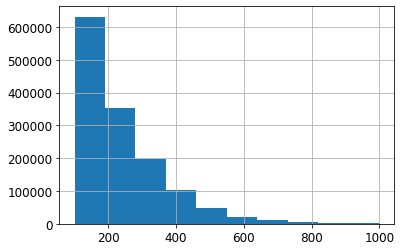

In [149]:
df.NUMBER_OF_TRIPS.hist()

MULTIPLE_TNPS
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: NUMBER_OF_TRIPS, dtype: object

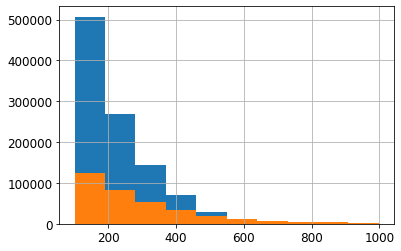

In [150]:
df.groupby('MULTIPLE_TNPS').NUMBER_OF_TRIPS.hist()

In [151]:
from scipy.stats import mannwhitneyu
data1 = df[df.MULTIPLE_TNPS == False].NUMBER_OF_TRIPS
data2 = df[df.MULTIPLE_TNPS == True].NUMBER_OF_TRIPS
stat, p = mannwhitneyu(data1, data2)

In [152]:
stat

140615954207.5

In [153]:
p

0.0

Distributions are the same

In [154]:
df[df.MULTIPLE_TNPS == False].NUMBER_OF_TRIPS.describe()

count    1.032764e+06
mean     2.229997e+02
std      1.099077e+02
min      1.000000e+02
25%      1.370000e+02
50%      1.920000e+02
75%      2.790000e+02
max      9.980000e+02
Name: NUMBER_OF_TRIPS, dtype: float64

In [155]:
df[df.MULTIPLE_TNPS == True].NUMBER_OF_TRIPS.describe()

count    344814.000000
mean        286.032560
std         170.255034
min         100.000000
25%         158.000000
50%         237.000000
75%         362.000000
max         999.000000
Name: NUMBER_OF_TRIPS, dtype: float64

In [156]:
df[df.MULTIPLE_TNPS == False].NUMBER_OF_TRIPS.std() / df[df.MULTIPLE_TNPS == False].NUMBER_OF_TRIPS.mean()

0.4928603364981521

In [157]:
df[df.MULTIPLE_TNPS == True].NUMBER_OF_TRIPS.std() / df[df.MULTIPLE_TNPS == True].NUMBER_OF_TRIPS.mean()

0.5952295596440743

But for MULTIPLE_TNPS == True variance is bigger

Checking models. The best one must be decision tree and DecTrees based enseble methods, because of target is limited in up(value more than/equal 1000 means outlier), even if it is more, it surely will not be much more than 1000. Also we have almost all categorial features.

In [158]:
df.head()

,REPORTED_YEAR,REPORTED_MONTH,STATE,MAKE,MODEL,COLOR,MODEL_YEAR,NUMBER_OF_TRIPS,MULTIPLE_TNPS,CHANGED_COLOR,...,G,B,RUN_TIME,REPORTED_YEAR_MONTH,MONTH,MAKE_FREQ_ENCODE,STATE_FREQ_ENCODE,MODEL_FREQ_ENCODE,COLOR_FREQ_ENCODE,NUM_TRIPS_SCALED
0,2015,2,IL,Toyota,highlander,Black,2010,263,False,black,...,0.0,0.0,5,2015.166667,0.909632,0.255061,0.960166,0.008901,0.323267,0.181313
1,2015,2,IL,Toyota,camry,Black,2008,204,False,black,...,0.0,0.0,7,2015.166667,0.909632,0.255061,0.960166,0.093746,0.323267,0.115684
2,2015,2,IL,Toyota,camry,Black,2009,122,False,black,...,0.0,0.0,6,2015.166667,0.909632,0.255061,0.960166,0.093746,0.323267,0.024472
3,2015,2,IL,Mazda,mazda3,Silver,2012,150,False,silver,...,192.0,192.0,3,2015.166667,0.909632,0.016199,0.960166,0.005060,0.202272,0.055617
4,2015,2,IL,Chrysler,Other,White/Pearl,2008,208,False,other,...,NaN,NaN,7,2015.166667,0.909632,0.022878,0.960166,0.063974,0.001004,0.120133


I decided to use unscaled target feature, because it's so important for trees, but it allows easier interpret and evaluate metric

In [159]:
X_train = df[['RUN_TIME', 'MONTH', 'MAKE_FREQ_ENCODE' ,'MODEL_FREQ_ENCODE', 'COLOR_FREQ_ENCODE','STATE_FREQ_ENCODE']]
y_train = df[['NUMBER_OF_TRIPS']]

In [160]:
from sklearn.metrics import r2_score

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 100000)

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
forest = RandomForestRegressor(random_state = 42)
forest.fit(X_train, y_train)

C:\Users\Acer\AppData\Local\Temp/ipykernel_14976/2010584907.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [164]:
r2_score(y_train, forest.predict(X_train))

0.16940337236948722

In [165]:
from sklearn.metrics import mean_absolute_error

In [166]:
mean_absolute_error(y_train, forest.predict(X_train))

87.14502185718825

In [167]:
r2_score(y_test, forest.predict(X_test))

-0.017952719642738924

In [168]:
mean_absolute_error(y_test, forest.predict(X_test))

98.89730202675739

In [169]:
y_train.describe()

,NUMBER_OF_TRIPS
count,1.277578e+06
mean,2.388229e+02
std,1.306231e+02
min,1.000000e+02
25%,1.410000e+02
50%,2.010000e+02
75%,2.980000e+02
max,9.990000e+02


In [170]:
from sklearn.ensemble import GradientBoostingRegressor

In [171]:
gradBoost = GradientBoostingRegressor(random_state = 42)
gradBoost.fit(X_train, y_train)

C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [172]:
r2_score(y_train, gradBoost.predict(X_train))

0.030726644656864255

In [173]:
mean_absolute_error(y_train, gradBoost.predict(X_train))

97.18235743339882

In [174]:
r2_score(y_test, gradBoost.predict(X_test))

0.03140416724926165

In [175]:
mean_absolute_error(y_test, gradBoost.predict(X_test))

97.0314539985467

In [176]:
from sklearn.tree import DecisionTreeRegressor

In [177]:
tree = DecisionTreeRegressor(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [178]:
r2_score(y_train, tree.predict(X_train))

0.17769614805290623

In [179]:
mean_absolute_error(y_train, tree.predict(X_train))

84.67865895029058

In [180]:
r2_score(y_test, tree.predict(X_test))

-0.07462721569208419

In [181]:
mean_absolute_error(y_test, tree.predict(X_test))

101.1864022593941

In [182]:
X_train

,RUN_TIME,MONTH,MAKE_FREQ_ENCODE,MODEL_FREQ_ENCODE,COLOR_FREQ_ENCODE,STATE_FREQ_ENCODE
342646,2,0.281733,0.062069,0.017212,0.148026,0.960166
978912,6,0.989821,0.016199,0.063974,0.323267,0.960166
941034,5,0.909632,0.022878,0.005696,0.323267,0.960166
236851,0,0.540641,0.255061,0.093746,0.323267,0.960166
303350,6,0.755750,0.005922,0.001133,0.029944,0.960166
...,...,...,...,...,...,...
300884,1,0.755750,0.062069,0.017212,0.323267,0.960166
1047618,4,0.281733,0.062069,0.002902,0.126428,0.960166
641818,9,0.755750,0.017489,0.001434,0.148026,0.960166
806202,7,-0.909632,0.003526,0.063974,0.202272,0.960166


So r2 here also small, but better than for linear regression. Considering that simple tree has better result than forest and GBR, so we are dealing with overlearning in general, but for single model result on train and test set haven't big difference.

Checking reliability of tree result using bootstrap

In [183]:
size = 30
metrics = np.array([])
for i in range(10000):
    choices = list()
    for choice in range(size):
        choices.append(np.random.randint(low = 0, high = len(X_test)))
    metrics = np.append(metrics, mean_absolute_error(y_test.iloc[choices], tree.predict(X_test.iloc[choices])))

In [184]:
metrics

array([111.01326486, 105.60524905, 107.56527585, ...,  99.90768579,
        98.46730983, 114.14974822])

In [185]:
metrics = pd.DataFrame(metrics)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

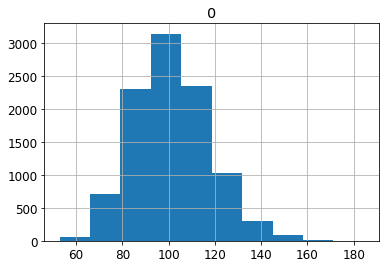

In [186]:
metrics.hist()

In [187]:
metrics.describe()

,0
count,10000.000000
mean,101.312637
std,16.351087
min,52.891222
25%,89.685252
50%,100.160619
75%,111.520219
max,184.440040


In [188]:
from scipy.stats import normaltest
stat, p = normaltest(metrics)

In [189]:
stat

array([305.7193271])

In [190]:
p

array([4.11047126e-67])

In [191]:
import scipy.stats as st

In [192]:
st.norm.interval(0.95, loc=metrics.mean(), scale=metrics.std())

(array([69.2650961]), array([133.36017852]))

In [193]:
low = st.norm.interval(0.95, loc=metrics.mean(), scale=metrics.std())[0][0]

In [194]:
high = st.norm.interval(0.95, loc=metrics.mean(), scale=metrics.std())[1][0]

In [195]:
metrics = metrics.rename({0:'metric'}, axis = 1)

In [196]:
metrics['in_interval'] = metrics['metric'].apply(lambda x : 1 if ((x > low) & (x < high)) else 0)

In [197]:
metrics

,metric,in_interval
0,111.013265,1
1,105.605249,1
2,107.565276,1
3,79.649562,1
4,90.184774,1
...,...,...
9995,82.356030,1
9996,78.132260,1
9997,99.907686,1
9998,98.467310,1


In [198]:
import seaborn as sns

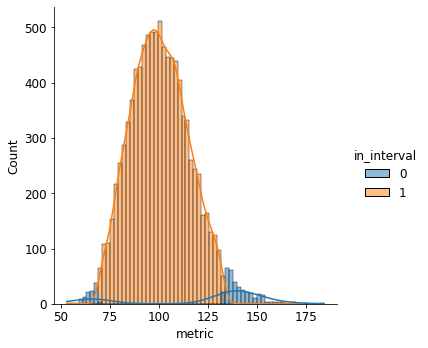

In [199]:
sns.displot(data = metrics, x = 'metric', kde=True, hue = 'in_interval')

So our error will be in [69, 133] with 95% probability

In [200]:
y_train.describe()

,NUMBER_OF_TRIPS
count,1.277578e+06
mean,2.388229e+02
std,1.306231e+02
min,1.000000e+02
25%,1.410000e+02
50%,2.010000e+02
75%,2.980000e+02
max,9.990000e+02


Let's also try RFECV for feature selection

In [201]:
from sklearn.feature_selection import RFECV

In [202]:
rfe = RFECV(estimator = tree, cv = 3, verbose = 1)

In [203]:
rfe.fit(X_train, y_train)

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFECV(cv=3, estimator=DecisionTreeRegressor(random_state=42), verbose=1)

In [204]:
rfe.get_support()

array([False, False,  True, False,  True, False])

In [205]:
X_train.columns[rfe.get_support()]

Index(['MAKE_FREQ_ENCODE', 'COLOR_FREQ_ENCODE'], dtype='object')

So RFECV left only two features - color and make. That is intresting, but anyway we can see that r2 become much worse, also MAE.

In [206]:
X_train.columns

Index(['RUN_TIME', 'MONTH', 'MAKE_FREQ_ENCODE', 'MODEL_FREQ_ENCODE',
       'COLOR_FREQ_ENCODE', 'STATE_FREQ_ENCODE'],
      dtype='object')

In [207]:
rfe.ranking_

array([3, 2, 1, 4, 1, 5])

Here can see rfe top of features:

1 - MAKE, COLOR;

2 - MONTH;

3 - RUN_TIME;

4 - MODEL;

5 - STATE;

In [208]:
tree = DecisionTreeRegressor(random_state = 42)
tree.fit(X_train[X_train.columns[rfe.get_support()]], y_train)

DecisionTreeRegressor(random_state=42)

In [209]:
r2_score(y_train, tree.predict(X_train[X_train.columns[rfe.get_support()]]))

0.024898557078501415

In [210]:
mean_absolute_error(y_train, tree.predict(X_train[X_train.columns[rfe.get_support()]]))

97.438597672701

In [211]:
r2_score(y_test, tree.predict(X_test[X_train.columns[rfe.get_support()]]))

0.023727112949105567

In [212]:
mean_absolute_error(y_test, tree.predict(X_test[X_train.columns[rfe.get_support()]]))

97.38795780514633

In [213]:
size = 30
metrics = np.array([])
for i in range(10000):
    choices = list()
    for choice in range(size):
        choices.append(np.random.randint(low = 0, high = len(X_test)))
    metrics = np.append(metrics, mean_absolute_error(y_test.iloc[choices], tree.predict(X_test[X_train.columns[rfe.get_support()]].iloc[choices])))

In [214]:
from scipy.stats import normaltest
stat, p = normaltest(metrics)

In [215]:
stat

430.9746458243145

In [216]:
p

2.600427434195351e-94

In [217]:
st.norm.interval(0.95, loc=metrics.mean(), scale=metrics.std())

(67.06877598121284, 127.33245993159244)

In [218]:
low = st.norm.interval(0.95, loc=metrics.mean(), scale=metrics.std())[0]

In [219]:
high = st.norm.interval(0.95, loc=metrics.mean(), scale=metrics.std())[1]

In [220]:
metrics = pd.DataFrame(metrics)

In [221]:
metrics = metrics.rename({0:'metric'}, axis = 1)

In [222]:
metrics['in_interval'] = metrics['metric'].apply(lambda x : 1 if ((x > low) & (x < high)) else 0)

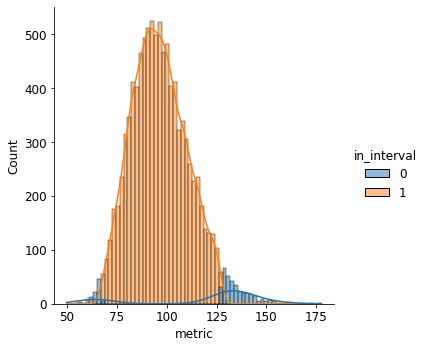

In [223]:
sns.displot(data = metrics, x = 'metric', kde=True, hue = 'in_interval')

So, we can do gridsearch or try other models, but without more data(most likely about drivers) we likely can't greatly improve metrics.